# Notebook

Atividades da análise exploratória, de acordo com as notas de aula do Ogasawara:

## Identificar data objects (entidades e seus atributos)
Registrar o tipo de cada atributo (Nominal, binário, numérico)
*nominal: tipos de coisas
*binary: 0 ou 1, S e N (lembrando que pode ser simétrico ou assimétrico)
*ordinal: valores que representam relação de ordenação (ranking) das entidades ex: tamanho: p-m-g
*quantidade: numeros não discretos
*intervalo: medidas em uma escala sem um zero-point. ex> temperatura, datas do calendario, etc
*razão:  medidas em uma escala com um zero-point: ex: graus em celsius, quantidades monetárias, etc.

## Fazer descrições estatísticas dos dados:
Centralidade e características de dispersão (Ex. mediana, max, min, quantis, outliers, variancia, etc).
Dimensões numéricas: 
    dispersão em intervalos de multipla granularidade: boxplots em intervalos computados. 
    dispersão em métricas computadas: boxplots no cubo transformado (datawarehouse)
 
Exemplos de aula: 
*média, mediana, moda
*distribuição normal, assimétrica (positiva/negativa)
*quartis, faixa inter-quartis, sumário de 5 numeros (min, q1, mediana, q2, max): boxplot
*variância e desvio-padrão.

Fazer a descrição através de gráficos boxplot, histogramas, qualtile plot, scatter plot.

**Identificar outliers**: valores maiores que Q3 + 1,5*IQR ou menores que Q1 - 1,5*IQR

## Aplicar outras técnicas
Matriz de dados  
Matriz de dissimilaridade  
 (ver slides sobre Medidas de proximidade e dissimilaridade)





## Arquivos de dados  
Conforme descrição do Ogasawara em [Brazilian Flight Dataset](http://eic.cefet-rj.br/~eogasawara/brazilian-flight-datasets/):  
**airports-br.xlsx** - Lista de aeroportos. Não fornecido. Usaremos o do Gustavo: [airports.dat](https://openflights.org/data.html).  
**vra.RData** - todos os dados sobre voos, de jan/2009 a dez/2017.  
**airports_hist.xlsx** - Não fornecido. Seriam os histogramas das atividades dos 62 principis aeroportos, correspondendo a 92% do tráfego monitorado pela ANAC.  
**wu.RData** - informações sobre o clima nos principais 62 aeroportos.  
**vra-wu.RData** - informações sobre os voos, com dados do clima na partida e chegada nessses 62 aeroportos.  




## Questões suscitadas
1. Qual é o percentual de voos atrasados em relação ao total 
  1. por ano?
  1. por aeroporto?
  1. por companhia aérea?
  1. por mês do ano?
  1. por umidade/temperatura/pressão?
  1. por visibilidade?
  1. por condições climáticas?
1. É possível identificar a propagação de atrasos (ex. atraso em POA = atraso em CGH)?
1. É possível identificar algum *trigger* meteorologico que sirva como preditor de atrasos?
1. É possível correlacionar esse trigger com os atrasos (Ex. CHUVA em POA = atraso em CGH)?
1. Quais foram as datas com maior quantidade de delays?
1. Há correlação entre as condições meteorológicas e os atrasos? (ou haverá outros motivos que os expliquem?)
1. Quais são as justificativas mais frequentes para os atrasos?


### Arquivo **wu.RData**

In [28]:
load("dados/wu.RData") 
head(wu)

data.airport,data.date,data.hour,data.temperature,data.dew_point,data.humidity,data.pressure,data.visibility,data.events,data.conditions
SBGR,2009-01-01,00:00,20,19,94,1016,NA,,Mist
SBGR,2009-01-02,00:00,20,19,94,1015,NA,,Clear
SBGR,2009-01-03,00:00,21,20,94,1012,10,Rain,Rain
SBGR,2009-01-04,00:00,21,19,94,1008,10,"Rain , Thunderstorm",Thunderstorms and Rain
SBGR,2009-01-05,00:00,16,16,100,1015,10,Rain,Mostly Cloudy
SBGR,2009-01-06,00:00,16,14,88,1017,10,,Mostly Cloudy


In [29]:
    summary(wu)

 data.airport        data.date          data.hour         data.temperature
 Length:4438934     Length:4438934     Length:4438934     Min.   : 0.00   
 Class :character   Class :character   Class :character   1st Qu.:20.00   
 Mode  :character   Mode  :character   Mode  :character   Median :24.00   
                                                          Mean   :23.39   
                                                          3rd Qu.:27.00   
                                                          Max.   :90.00   
                                                          NA's   :56735   
 data.dew_point   data.humidity    data.pressure    data.visibility  
 Min.   : 0.00    Min.   :  0.00   Min.   :   0.0   Min.   :    0.0  
 1st Qu.:15.00    1st Qu.: 60.00   1st Qu.:1011.0   1st Qu.:   10.0  
 Median :19.00    Median : 74.00   Median :1014.0   Median :   10.0  
 Mean   :18.19    Mean   : 70.78   Mean   : 972.9   Mean   :   64.8  
 3rd Qu.:22.00    3rd Qu.: 88.00   3rd Qu.:1017.0 

WU: 
1. converter o campo *data.date* de character para date 
1. decompor o novo campo em ano, mes, dia
1. converter o campo *data.time* de character para time
1. decompor o novo campo em hora, minuto
1. descartar outliers de data.visibility
1. descartar outliers de data.umidade
1. fazer lista de data.events únicos
1. fazer lista de data.conditions únicos

Explicação sobre influencia do dew point na formação de chuva e neblina [aqui](https://pt.wikipedia.org/wiki/Ponto_de_orvalho) 



In [30]:
objects()

[1] "grBoxDew"    "grBoxHumid"  "grBoxTemp"   "grHistDew"   "grHistHumid"
 [6] "grHistPress" "grHistTemp"  "grHistVis"   "temperature" "wu"

In [31]:
library(ggplot2)
library(gridExtra)
#grHistTemp = ggplot(wu, aes(x = data.temperature)) + geom_histogram(binwidth = 1)
#grHistDew = ggplot(wu, aes(x = data.dew_point)) + geom_histogram(binwidth = 1)
#grHistHumid = ggplot(wu, aes(x = data.humidity)) + geom_histogram(bins = 1000)
#grHistPress = ggplot(wu, aes(x = data.pressure)) + geom_histogram(bins = 10)
#grHistVis = ggplot(wu, aes(x = data.visibility)) + geom_histogram(binwidth = 1)



Warning message:
“Removed 56735 rows containing non-finite values (stat_bin).”Warning message:
“Removed 185961 rows containing non-finite values (stat_bin).”Warning message:
“Removed 59859 rows containing non-finite values (stat_bin).”Warning message:
“Removed 131282 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1178872 rows containing non-finite values (stat_bin).”

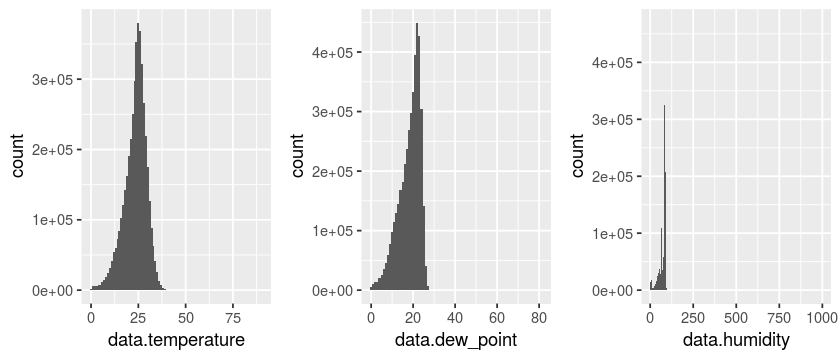

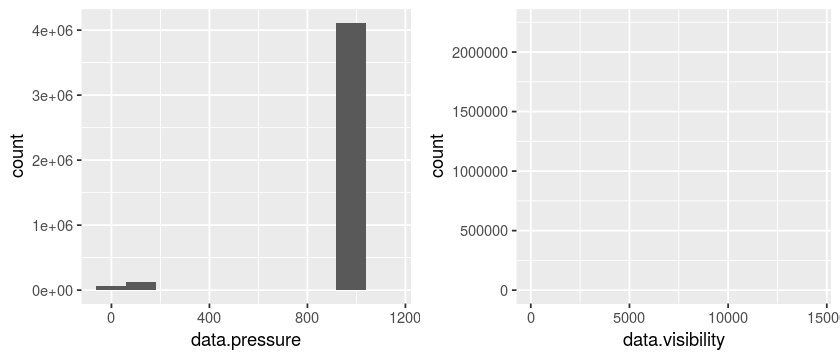

In [32]:
#options(repr.plot.width=7, repr.plot.height=3)
#grid.arrange(grobs=list(grHistTemp, grHistDew, grHistHumid ), ncol=3)
#grid.arrange(grobs=list(grHistPress, grHistVis ), ncol=2)

In [33]:
#grBoxTemp = ggplot(wu, aes(x="temp", y = data.temperature)) + geom_boxplot(outlier.colour="red")
#grBoxDew = ggplot(wu, aes(data.dew_point)) + geom_boxplot(outlier.colour="red")
#grBoxHumid = ggplot(wu, aes(data.humidity)) + geom_boxplot(outlier.colour="red")
#grid.arrange(grobs=list(grBoxTemp, grBoxDew, grBoxHumid ), ncol=3)

## Temperature

As temperaturas acima de 50 graus são descartadas porque tratam-se provavelmente de erros de medição.

In [35]:
wu$data.temperature[wu$data.temperature >= 50] <- NA

Warning message:
“Removed 56750 rows containing non-finite values (stat_bin).”Warning message:
“Removed 56750 rows containing non-finite values (stat_boxplot).”

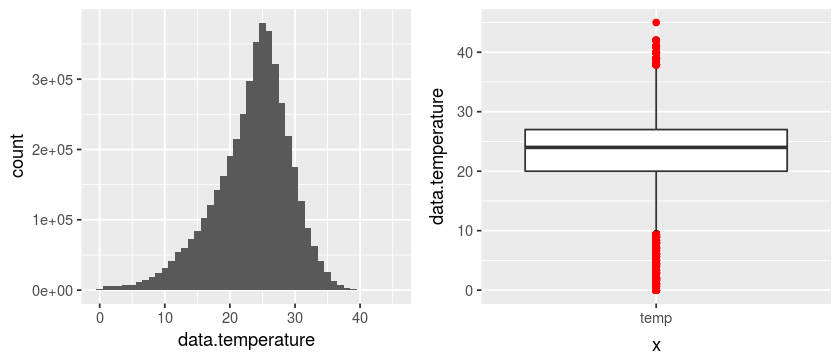

In [36]:
grHistTemp = ggplot(wu, aes(x = data.temperature)) + geom_histogram(binwidth = 1)
grBoxTemp = ggplot(wu, aes(x="Temperature", y = data.temperature)) + geom_boxplot(outlier.colour="red")
grid.arrange(grobs=list(grHistTemp, grBoxTemp ), ncol=2)

## Dew Point

Pontos de orvalho acima de 50 graus são descartados porque tratam-se provavelmente de erros.

In [41]:
wu$data.dew_point[wu$data.dew_point >= 50] <- NA

Warning message:
“Removed 185969 rows containing non-finite values (stat_bin).”Warning message:
“Removed 185969 rows containing non-finite values (stat_boxplot).”

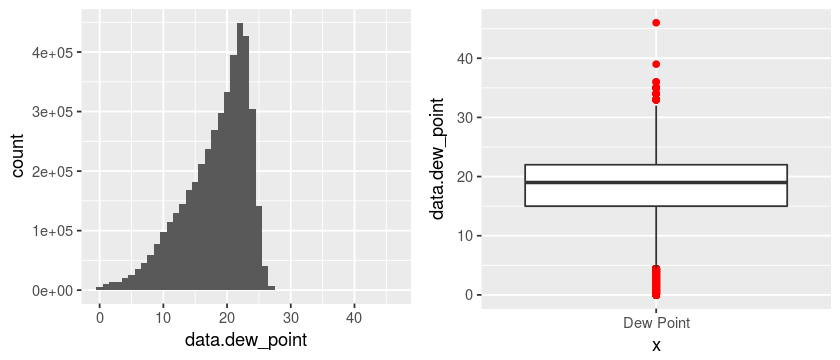

In [43]:
grHistDew = ggplot(wu, aes(x = data.dew_point)) + geom_histogram(binwidth = 1)
grBoxDew = ggplot(wu, aes(x="Dew Point", y = data.dew_point)) + stat_boxplot(outlier.colour="red")
grid.arrange(grobs=list(grHistDew, grBoxDew ), ncol=2)

## Humidity

Valores de Humidade acima de 100% são descartados, pois tratam-se de erros.

In [45]:
wu$data.humidity[wu$data.humidity > 100] <- NA

Warning message:
“Removed 59879 rows containing non-finite values (stat_bin).”Warning message:
“Removed 59879 rows containing non-finite values (stat_boxplot).”

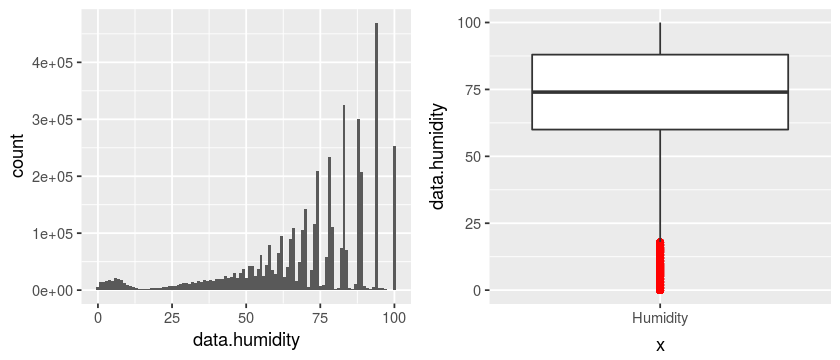

In [46]:
grHistHumid = ggplot(wu, aes(x = data.humidity)) + geom_histogram(binwidth = 1)
grBoxHumid = ggplot(wu, aes(x="Humidity", y = data.humidity)) + stat_boxplot(outlier.colour="red")
grid.arrange(grobs=list(grHistHumid, grBoxHumid ), ncol=2)

## Pressure

~~Valores de pressão acima de 1200 são descartados.~~ 

In [ ]:
#wu$data.pressure[wu$data.pressure > 100] <- NA

Warning message:
“Removed 131282 rows containing non-finite values (stat_bin).”Warning message:
“Removed 131282 rows containing non-finite values (stat_boxplot).”

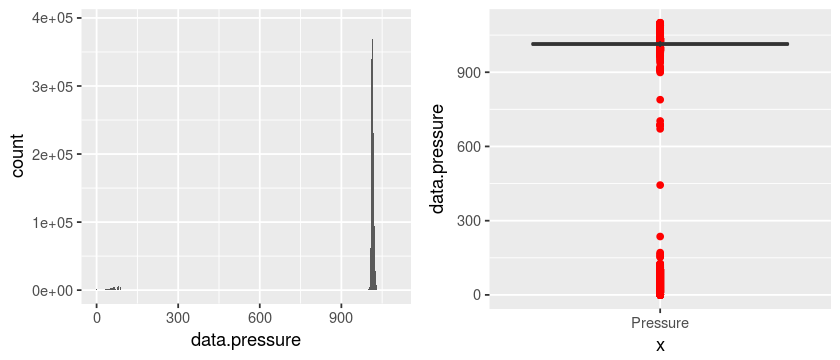

In [47]:
grHistPress = ggplot(wu, aes(x = data.pressure)) + geom_histogram(binwidth = 1)
grBoxPress = ggplot(wu, aes(x="Pressure", y = data.pressure)) + stat_boxplot(outlier.colour="red")
grid.arrange(grobs=list(grHistPress, grBoxPress ), ncol=2)

## Visibility

In [49]:
wu$data.visibility[wu$data.visibility > 10000] <- NA

Warning message:
“Removed 1178878 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1178878 rows containing non-finite values (stat_boxplot).”

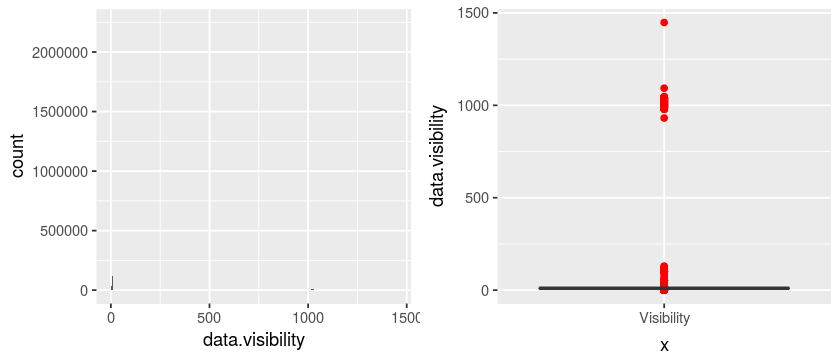

In [50]:
grHistVis = ggplot(wu, aes(x = data.visibility)) + geom_histogram(binwidth = 1)
grBoxVis = ggplot(wu, aes(x="Visibility", y = data.visibility)) + stat_boxplot(outlier.colour="red")
grid.arrange(grobs=list(grHistVis, grBoxVis ), ncol=2)

In [51]:
length(unique(wu$data.airport))


[1] 62

In [76]:
airports = data.frame(table(wu$data.airport))
#newdata <- mtcars[order(mpg),] 
airports <- airports[order(-airports$Freq),] 
names(airports)[names(airports)=="Var1"] <- "Airport"

In [77]:
head(airports)

,Airport,Freq
1,KJFK,78761
55,SBSV,78724
10,SBBR,78722
50,SBSG,78703
13,SBCG,78692
20,SBFL,78691


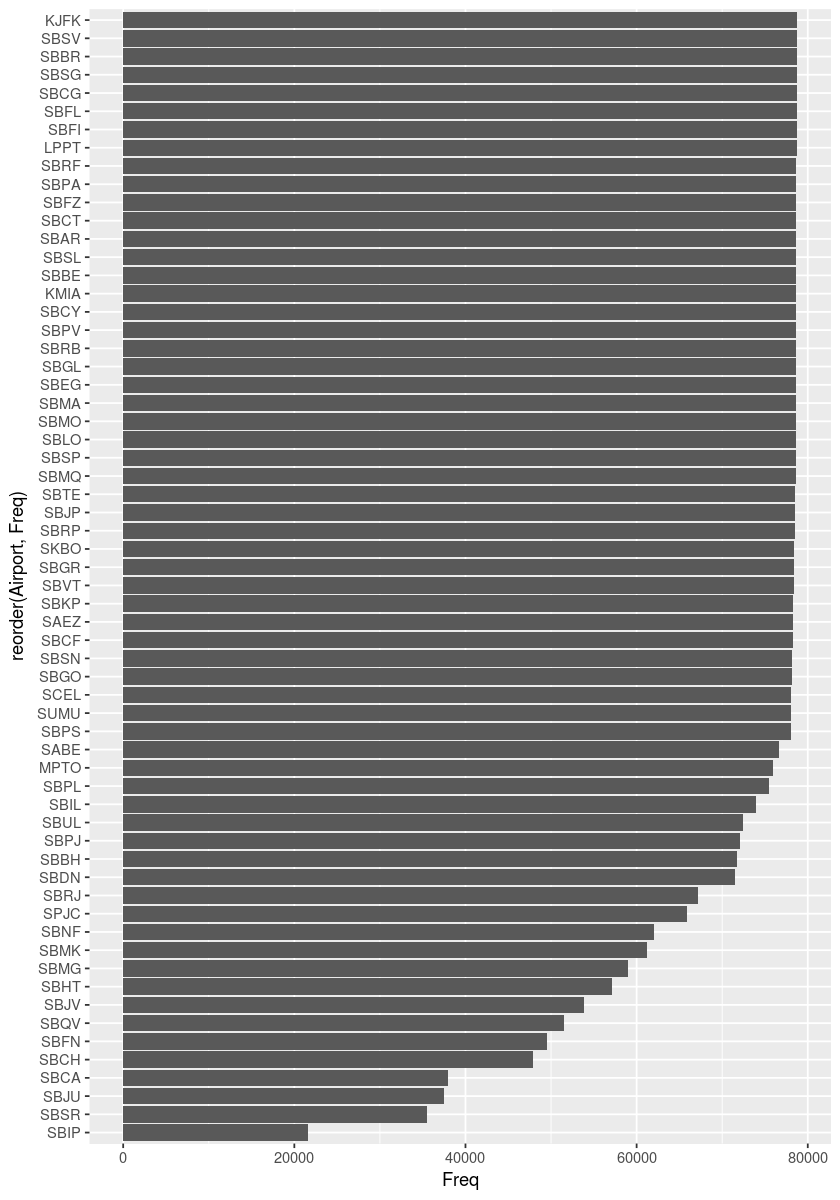

In [78]:
options(repr.plot.height=10)
ggplot(airports, aes(x=reorder(Airport, Freq), y=Freq)) + geom_bar(position="dodge",stat="identity") + coord_flip() 



# Análise Exploratória do dataset vrawu1


In [1]:
# Bibliotecas
library(readr)
suppressMessages(library(dplyr))
library(DataExplorer)
library(stats)
library(ggplot2)
library(readxl)
library(tidyr)

In [2]:
# Carga dos dados
setwd("/home/jeff/github/DM2018/")
load("datasets/vrawu17.RData")
vrawu17[1:5,]

codigo_tipo_linha,cod_justificativa,icao_empresa,codigo_di,icao_destino,icao_origem,timekey_partida,voo,partida_prevista,partida_real,⋯,destino_descricao,destino_cidade,destino_uf,destino_pais,destino_continente,descricao_codigo_di,empresa,nacionalidade,descricao_justificativa,tipo_linha
,XN,LTG,0,SCDA,SBEG,201708131500,8484,2017-08-13 15:20:00,NA,⋯,DIEGO ARACENA INTERNATIONAL AIRPORT,IQUIQUE,NA,CHILE,AMERICA DO SUL,Vôo Regular,ABSA,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA
,XB,TPA,0,SBCT,KMIA,201708130900,843,2017-08-13 09:00:00,NA,⋯,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,Vôo Regular,TAMPA S/A,ESTRANGEIRA,AUTORIZADO,NA
,NA,LTG,0,SVMI,SBEG,201708132100,8472,2017-08-13 21:42:00,2017-08-13 23:46:00,⋯,SIMON BOLIVAR INTERNATIONAL AIRPORT (MAIQUETIA INTERNATIONAL AIRPORT),CARACAS/INTL,NA,VENEZUELA,AMERICA DO SUL,Vôo Regular,ABSA,BRASILEIRA,NA,NA
,XN,LCO,0,SBKP,SBEG,201708140100,1509,2017-08-14 01:25:00,NA,⋯,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,Vôo Regular,LAN CARGO S.A,ESTRANGEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA
,XN,GLO,0,SBCT,SBPA,201708131300,1986,2017-08-13 13:02:00,NA,⋯,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA


In [3]:
# Mantém apenas os vôos nacionais
vrawu17 <- vrawu17 %>% filter(origem_pais=="BRASIL"& destino_pais=="BRASIL")

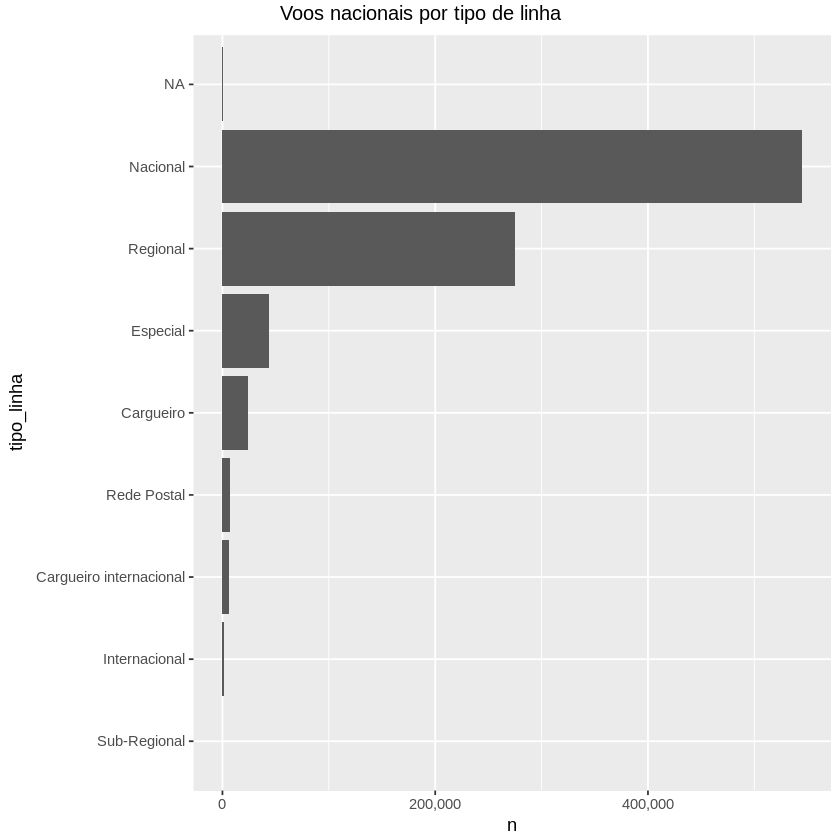

In [4]:
# Tipos de linhas
tipo_linha <- vrawu17 %>% count(tipo_linha)
plot_bar(tipo_linha, with = "n", title = "Voos nacionais por tipo de linha")

Obs.:
- Alguns voos nacionais estão classificados como internacionais (aparentemente, pernas de voos internacionais).
- Preferi analisar voos de todos os tipos

In [5]:
# Aeródromos
aerop = count(vrawu17, icao_origem)

São muitos aeródromos de pouca expressão. Vamos considerar apenas os que têm pelo menos 4 voos diários.

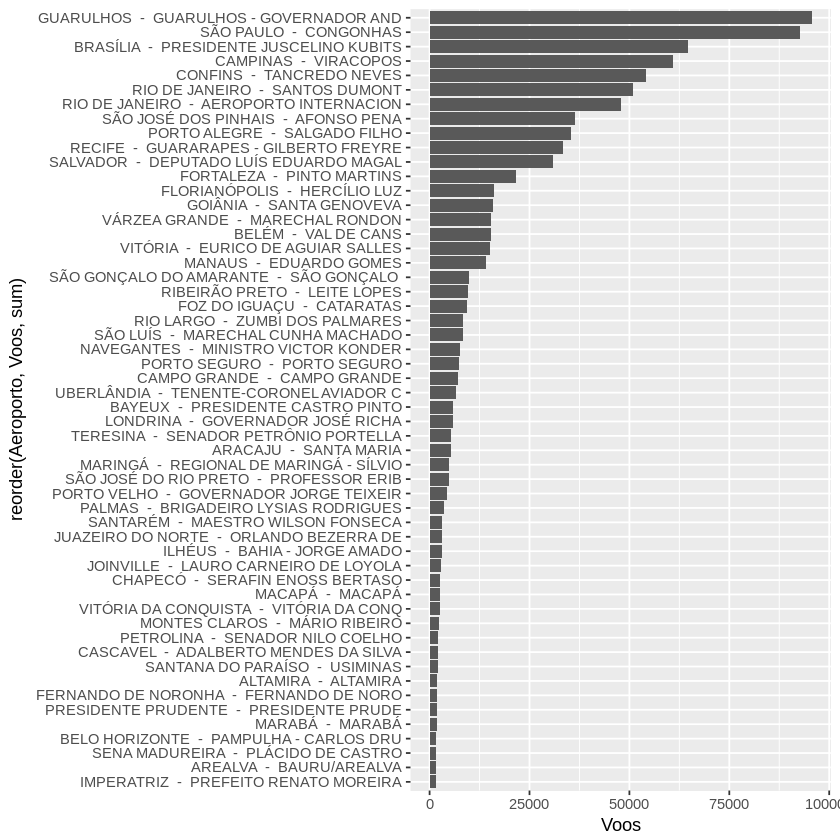

In [6]:
# Tabela temporaria com detalhes de aerportos
aerop = filter(aerop, n > 1460)
# Prepara rótulos mais apropriados para o gráfico
temp = select(vrawu17, icao_origem, origem_cidade, origem_descricao)
temp = unique(temp)
temp$aerop = substr(paste(temp$origem_cidade, " - ", temp$origem_descricao), 1, 40)
# Troca o código pelo nome 
aerop = merge(x = aerop, y = temp, all.x = TRUE)
aerop = select(aerop, icao_origem, aerop, n)
colnames(aerop) = c("Código", "Aeroporto", "Voos")
# Exibe o gráfico
ggplot(aerop, aes(x=reorder(Aeroporto,Voos,sum ) , y=Voos)) + geom_bar(show.legend = TRUE, stat = "identity") + coord_flip()
# (não foi possivel usar o Data Explorer pois há mais de 50 categorias na variável)
rm(temp)

In [7]:
# Filtrar o dataset
vrawu17 = vrawu17 %>% 
     filter(icao_origem %in% aerop$`Código`) %>%
     filter(icao_destino %in% aerop$`Código`)

Acrescentar a coluna que indica se houve algum atraso ou cancelamento devido a condições meteorológicas

In [8]:
# apenas os registros de cancelamento/atraso relacionados ao clima
# normativa IAC-1504
# http://www.anac.gov.br/assuntos/legislacao/legislacao-1/iac-e-is/iac/iac-1504/@@display-file/arquivo_norma/IAC1504.pdf
justificativas = select(vrawu17, cod_justificativa, descricao_justificativa)
justificativas = unique(justificativas)
justificativas = na.exclude(justificativas)
justmeteorologicas = filter(justificativas, cod_justificativa %in% c("WO", "WI", "WR", "WS", "WT", "WA", "XO", "XS", "XT", "AM", "RM"))

Cria a coluna target, contendo 1 para atrasos ou cancelamentos decorrentes do clima e 0 para outros casos.

In [9]:
# Cria coluna target, que identifica os atrasos ou cancelamentos provocados por eventos meteorológicos
target = ifelse(vrawu17$cod_justificativa %in% justmeteorologicas$cod_justificativa, 1, 0)
vrawu17 = cbind(vrawu17, target)

In [10]:
vrawu17[1:5,]

codigo_tipo_linha,cod_justificativa,icao_empresa,codigo_di,icao_destino,icao_origem,timekey_partida,voo,partida_prevista,partida_real,⋯,destino_cidade,destino_uf,destino_pais,destino_continente,descricao_codigo_di,empresa,nacionalidade,descricao_justificativa,tipo_linha,target
,XN,LCO,0,SBKP,SBEG,201708140100,1509,2017-08-14 01:25:00,NA,⋯,CAMPINAS,SP,BRASIL,AMERICA DO SUL,Vôo Regular,LAN CARGO S.A,ESTRANGEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA,0
,XN,GLO,0,SBCT,SBPA,201708131300,1986,2017-08-13 13:02:00,NA,⋯,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA,0
,NA,GLO,0,SBSV,SBGL,201708132100,2034,2017-08-13 21:35:00,2017-08-13 21:35:00,⋯,SALVADOR,BA,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,NA,0
,NA,GLO,0,SBGL,SBFZ,201708131200,2177,2017-08-13 12:57:00,2017-08-13 12:57:00,⋯,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,NA,0
,NA,GLO,0,SBRF,SBSP,201708130600,1552,2017-08-13 06:00:00,2017-08-13 06:00:00,⋯,RECIFE,PE,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,NA,0


In [11]:
# Cria coluna target_ori, que identifica os atrasos ou cancelamentos provocados por eventos meteorológicos no aeroporto de origem
justMeteorOrigem = filter(justificativas, cod_justificativa %in% c("WO", "XO"))
target_ori = ifelse(vrawu17$cod_justificativa %in% justMeteorOrigem$cod_justificativa, 1, 0)
vrawu17 = cbind(vrawu17, target_ori)

In [12]:
vrawu17[1:5,]

codigo_tipo_linha,cod_justificativa,icao_empresa,codigo_di,icao_destino,icao_origem,timekey_partida,voo,partida_prevista,partida_real,⋯,destino_uf,destino_pais,destino_continente,descricao_codigo_di,empresa,nacionalidade,descricao_justificativa,tipo_linha,target,target_ori
,XN,LCO,0,SBKP,SBEG,201708140100,1509,2017-08-14 01:25:00,NA,⋯,SP,BRASIL,AMERICA DO SUL,Vôo Regular,LAN CARGO S.A,ESTRANGEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA,0,0
,XN,GLO,0,SBCT,SBPA,201708131300,1986,2017-08-13 13:02:00,NA,⋯,PR,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA,0,0
,NA,GLO,0,SBSV,SBGL,201708132100,2034,2017-08-13 21:35:00,2017-08-13 21:35:00,⋯,BA,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,NA,0,0
,NA,GLO,0,SBGL,SBFZ,201708131200,2177,2017-08-13 12:57:00,2017-08-13 12:57:00,⋯,RJ,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,NA,0,0
,NA,GLO,0,SBRF,SBSP,201708130600,1552,2017-08-13 06:00:00,2017-08-13 06:00:00,⋯,PE,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,NA,0,0


Quais aeroportos atrasam/cancelam mais voos devido a condções meteorológicas?

In [13]:
# Ordena os aeroportos por percentual de atrasos
ranking_aerop_atrasos  = 
  vrawu17 %>% 
    group_by(icao_origem) %>% 
    count(target_ori) %>% 
    spread(target_ori, n) %>% 
    mutate(perc = `1`/`0`)

In [14]:
# Recupera os nomes dos aeroportos e classifica
ranking_aerop_atrasos = merge(x=ranking_aerop_atrasos, y = aerop, by.x = "icao_origem", by.y = "Código", all.x = TRUE)
ranking_aerop_atrasos =ranking_aerop_atrasos %>% select(icao_origem, Aeroporto, `0`, `1`, Voos, perc) %>% arrange(desc(perc))

In [15]:
# Top 10 com mais atrasos/cancelamentos
ranking_aerop_atrasos[1:10,]

icao_origem,Aeroporto,0,1,Voos,perc
SBCA,CASCAVEL - ADALBERTO MENDES DA SILVA,2033,86,2119,"0,04230202"
SBCH,CHAPECÓ - SERAFIN ENOSS BERTASO,2562,76,2638,"0,02966432"
SBQV,VITÓRIA DA CONQUISTA - VITÓRIA DA CONQ,2531,72,2603,"0,02844725"
SBAE,AREALVA - BAURU/AREALVA,1238,25,1522,"0,02019386"
SBJV,JOINVILLE - LAURO CARNEIRO DE LOYOLA,2825,47,2872,"0,01663717"
SBIL,ILHÉUS - BAHIA - JORGE AMADO,3002,48,3050,"0,01598934"
SBMG,MARINGÁ - REGIONAL DE MARINGÁ - SÍLVIO,4803,67,4870,"0,01394961"
SBLO,LONDRINA - GOVERNADOR JOSÉ RICHA,5712,72,5784,"0,01260504"
SBFN,FERNANDO DE NORONHA - FERNANDO DE NORO,1887,22,1909,"0,01165872"
SBMQ,MACAPÁ - MACAPÁ,2603,30,2633,"0,01152516"


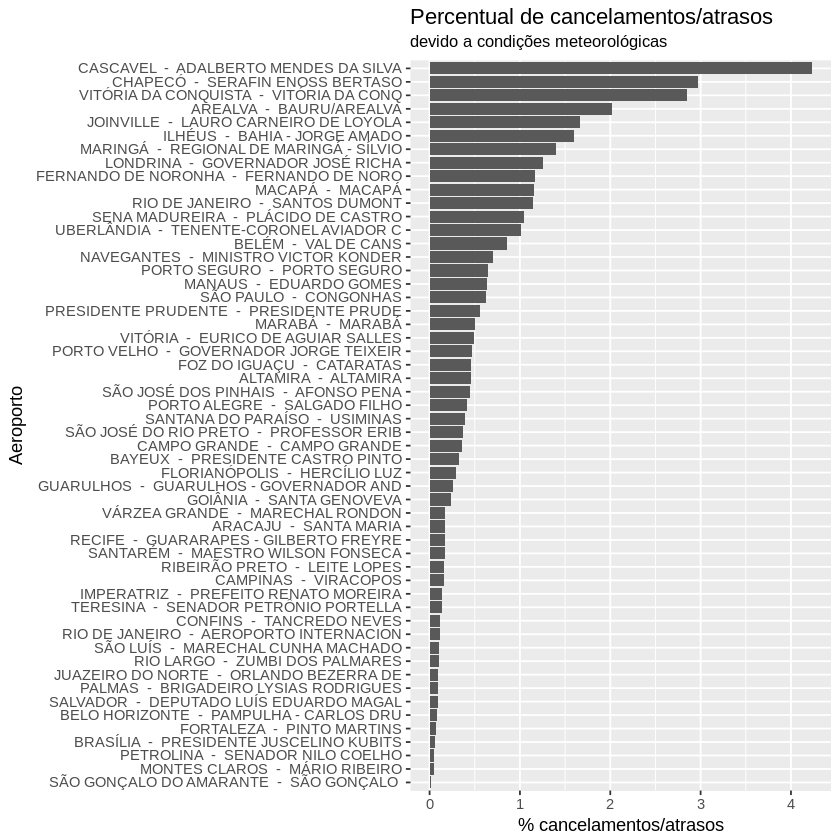

In [27]:
# Exibe o gráfico
# Exibe o gráfico
g = ggplot(ranking_aerop_atrasos, aes(x=reorder(Aeroporto,perc,sum ) , y=perc*100)) + 
    geom_bar(show.legend = TRUE, stat = "identity") +
    coord_flip()
g = g + ggtitle("Percentual de cancelamentos/atrasos", subtitle="devido a condições meteorológicas") +
        xlab("Aeroporto") +
        ylab("% cancelamentos/atrasos")
plot(g)

Análise de condições climáticas durante os eventos de atrasos/cancelamentos

In [30]:
# Top 50 com mais atrasos/cancelamentos
aerop_atrasos_top_50 = ranking_aerop_atrasos[1:10,1:2]
vrawu50 = vra

icao_origem,Aeroporto
SBCA,CASCAVEL - ADALBERTO MENDES DA SILVA
SBCH,CHAPECÓ - SERAFIN ENOSS BERTASO
SBQV,VITÓRIA DA CONQUISTA - VITÓRIA DA CONQ
SBAE,AREALVA - BAURU/AREALVA
SBJV,JOINVILLE - LAURO CARNEIRO DE LOYOLA
SBIL,ILHÉUS - BAHIA - JORGE AMADO
SBMG,MARINGÁ - REGIONAL DE MARINGÁ - SÍLVIO
SBLO,LONDRINA - GOVERNADOR JOSÉ RICHA
SBFN,FERNANDO DE NORONHA - FERNANDO DE NORO
SBMQ,MACAPÁ - MACAPÁ


# Análise Exploratória do dataset vrawu1


In [1]:
# Bibliotecas
library(readr)
suppressMessages(library(dplyr))
library(DataExplorer)
library(stats)
library(ggplot2)
library(readxl)
library(tidyr)

In [2]:
# Carga dos dados
setwd("/home/jeff/github/DM2018/")
load("datasets/vrawu17.RData")
vrawu17[1:5,]

codigo_tipo_linha,cod_justificativa,icao_empresa,codigo_di,icao_destino,icao_origem,timekey_partida,voo,partida_prevista,partida_real,⋯,destino_descricao,destino_cidade,destino_uf,destino_pais,destino_continente,descricao_codigo_di,empresa,nacionalidade,descricao_justificativa,tipo_linha
,XN,LTG,0,SCDA,SBEG,201708131500,8484,2017-08-13 15:20:00,NA,⋯,DIEGO ARACENA INTERNATIONAL AIRPORT,IQUIQUE,NA,CHILE,AMERICA DO SUL,Vôo Regular,ABSA,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA
,XB,TPA,0,SBCT,KMIA,201708130900,843,2017-08-13 09:00:00,NA,⋯,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,Vôo Regular,TAMPA S/A,ESTRANGEIRA,AUTORIZADO,NA
,NA,LTG,0,SVMI,SBEG,201708132100,8472,2017-08-13 21:42:00,2017-08-13 23:46:00,⋯,SIMON BOLIVAR INTERNATIONAL AIRPORT (MAIQUETIA INTERNATIONAL AIRPORT),CARACAS/INTL,NA,VENEZUELA,AMERICA DO SUL,Vôo Regular,ABSA,BRASILEIRA,NA,NA
,XN,LCO,0,SBKP,SBEG,201708140100,1509,2017-08-14 01:25:00,NA,⋯,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,Vôo Regular,LAN CARGO S.A,ESTRANGEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA
,XN,GLO,0,SBCT,SBPA,201708131300,1986,2017-08-13 13:02:00,NA,⋯,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA


In [3]:
# Mantém apenas os vôos nacionais
vrawu17 <- vrawu17 %>% filter(origem_pais=="BRASIL"& destino_pais=="BRASIL")

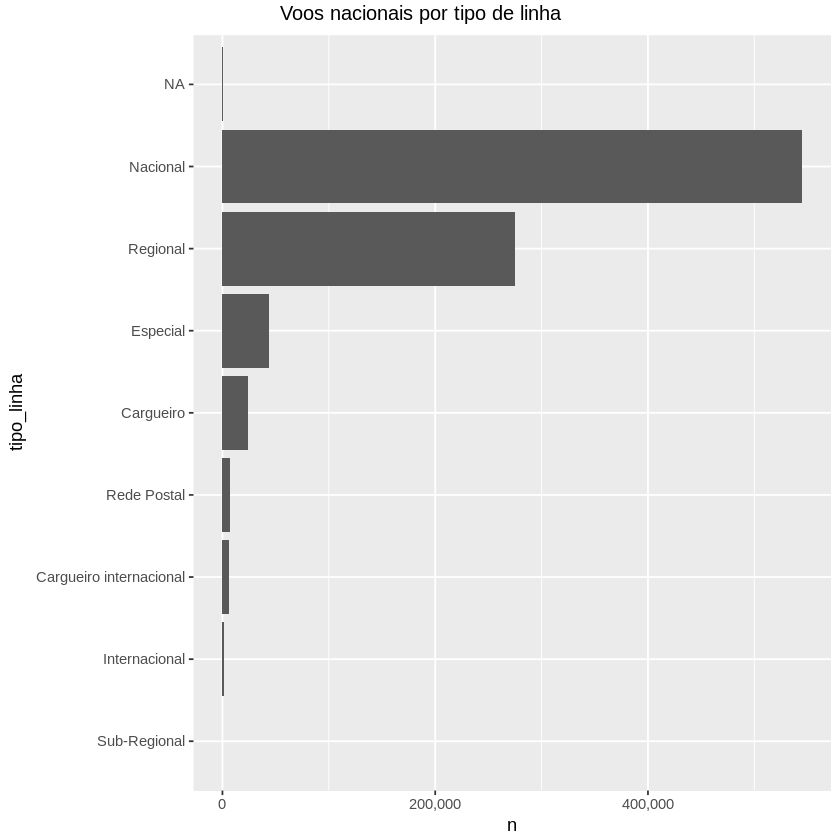

In [4]:
# Tipos de linhas
tipo_linha <- vrawu17 %>% count(tipo_linha)
plot_bar(tipo_linha, with = "n", title = "Voos nacionais por tipo de linha")

Obs.:
- Alguns voos nacionais estão classificados como internacionais (aparentemente, pernas de voos internacionais).
- Preferi analisar voos de todos os tipos

In [5]:
# Aeródromos
aerop = count(vrawu17, icao_origem)

São muitos aeródromos de pouca expressão. Vamos considerar apenas os que têm pelo menos 4 voos diários.

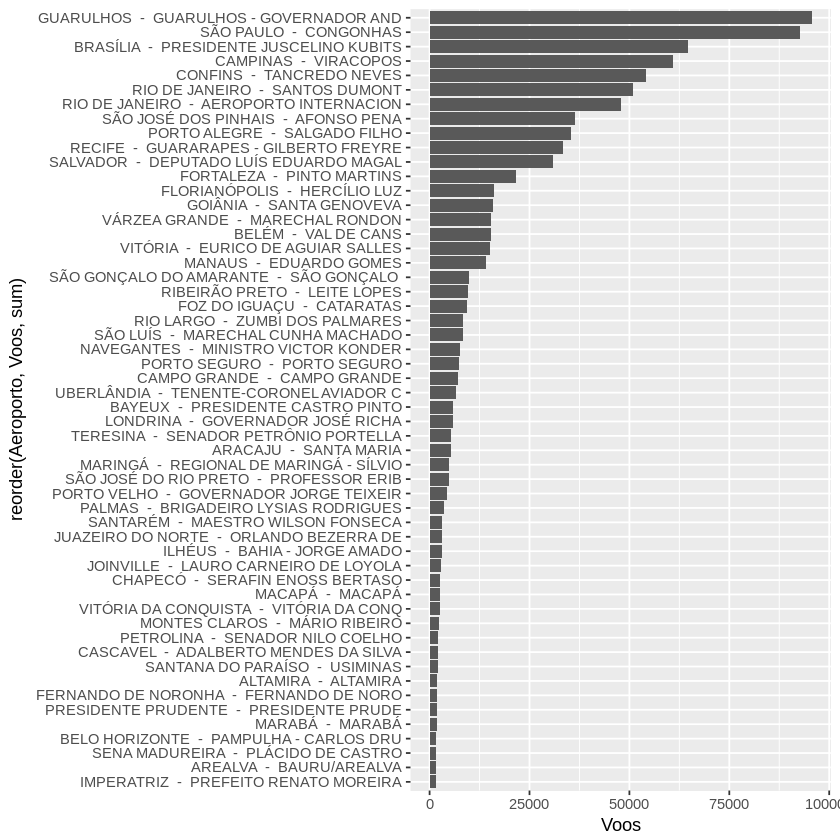

In [6]:
# Tabela temporaria com detalhes de aerportos
aerop = filter(aerop, n > 1460)
# Prepara rótulos mais apropriados para o gráfico
temp = select(vrawu17, icao_origem, origem_cidade, origem_descricao)
temp = unique(temp)
temp$aerop = substr(paste(temp$origem_cidade, " - ", temp$origem_descricao), 1, 40)
# Troca o código pelo nome 
aerop = merge(x = aerop, y = temp, all.x = TRUE)
aerop = select(aerop, icao_origem, aerop, n)
colnames(aerop) = c("Código", "Aeroporto", "Voos")
# Exibe o gráfico
ggplot(aerop, aes(x=reorder(Aeroporto,Voos,sum ) , y=Voos)) + geom_bar(show.legend = TRUE, stat = "identity") + coord_flip()
# (não foi possivel usar o Data Explorer pois há mais de 50 categorias na variável)
rm(temp)

In [7]:
# Filtrar o dataset
vrawu17 = vrawu17 %>% 
     filter(icao_origem %in% aerop$`Código`) %>%
     filter(icao_destino %in% aerop$`Código`)

Acrescentar a coluna que indica se houve algum atraso ou cancelamento devido a condições meteorológicas

In [8]:
# apenas os registros de cancelamento/atraso relacionados ao clima
# normativa IAC-1504
# http://www.anac.gov.br/assuntos/legislacao/legislacao-1/iac-e-is/iac/iac-1504/@@display-file/arquivo_norma/IAC1504.pdf
justificativas = select(vrawu17, cod_justificativa, descricao_justificativa)
justificativas = unique(justificativas)
justificativas = na.exclude(justificativas)
justmeteorologicas = filter(justificativas, cod_justificativa %in% c("WO", "WI", "WR", "WS", "WT", "WA", "XO", "XS", "XT", "AM", "RM"))

Cria a coluna target, contendo 1 para atrasos ou cancelamentos decorrentes do clima e 0 para outros casos.

In [9]:
# Cria coluna target, que identifica os atrasos ou cancelamentos provocados por eventos meteorológicos
target = ifelse(vrawu17$cod_justificativa %in% justmeteorologicas$cod_justificativa, 1, 0)
vrawu17 = cbind(vrawu17, target)

In [10]:
vrawu17[1:5,]

codigo_tipo_linha,cod_justificativa,icao_empresa,codigo_di,icao_destino,icao_origem,timekey_partida,voo,partida_prevista,partida_real,⋯,destino_cidade,destino_uf,destino_pais,destino_continente,descricao_codigo_di,empresa,nacionalidade,descricao_justificativa,tipo_linha,target
,XN,LCO,0,SBKP,SBEG,201708140100,1509,2017-08-14 01:25:00,NA,⋯,CAMPINAS,SP,BRASIL,AMERICA DO SUL,Vôo Regular,LAN CARGO S.A,ESTRANGEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA,0
,XN,GLO,0,SBCT,SBPA,201708131300,1986,2017-08-13 13:02:00,NA,⋯,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA,0
,NA,GLO,0,SBSV,SBGL,201708132100,2034,2017-08-13 21:35:00,2017-08-13 21:35:00,⋯,SALVADOR,BA,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,NA,0
,NA,GLO,0,SBGL,SBFZ,201708131200,2177,2017-08-13 12:57:00,2017-08-13 12:57:00,⋯,RIO DE JANEIRO,RJ,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,NA,0
,NA,GLO,0,SBRF,SBSP,201708130600,1552,2017-08-13 06:00:00,2017-08-13 06:00:00,⋯,RECIFE,PE,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,NA,0


In [11]:
# Cria coluna target_ori, que identifica os atrasos ou cancelamentos provocados por eventos meteorológicos no aeroporto de origem
justMeteorOrigem = filter(justificativas, cod_justificativa %in% c("WO", "XO"))
target_ori = ifelse(vrawu17$cod_justificativa %in% justMeteorOrigem$cod_justificativa, 1, 0)
vrawu17 = cbind(vrawu17, target_ori)

In [12]:
vrawu17[1:5,]

codigo_tipo_linha,cod_justificativa,icao_empresa,codigo_di,icao_destino,icao_origem,timekey_partida,voo,partida_prevista,partida_real,⋯,destino_uf,destino_pais,destino_continente,descricao_codigo_di,empresa,nacionalidade,descricao_justificativa,tipo_linha,target,target_ori
,XN,LCO,0,SBKP,SBEG,201708140100,1509,2017-08-14 01:25:00,NA,⋯,SP,BRASIL,AMERICA DO SUL,Vôo Regular,LAN CARGO S.A,ESTRANGEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA,0,0
,XN,GLO,0,SBCT,SBPA,201708131300,1986,2017-08-13 13:02:00,NA,⋯,PR,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA,0,0
,NA,GLO,0,SBSV,SBGL,201708132100,2034,2017-08-13 21:35:00,2017-08-13 21:35:00,⋯,BA,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,NA,0,0
,NA,GLO,0,SBGL,SBFZ,201708131200,2177,2017-08-13 12:57:00,2017-08-13 12:57:00,⋯,RJ,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,NA,0,0
,NA,GLO,0,SBRF,SBSP,201708130600,1552,2017-08-13 06:00:00,2017-08-13 06:00:00,⋯,PE,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,NA,NA,0,0


Quais aeroportos atrasam/cancelam mais voos devido a condções meteorológicas?

In [13]:
# Ordena os aeroportos por percentual de atrasos
ranking_aerop_atrasos  = 
  vrawu17 %>% 
    group_by(icao_origem) %>% 
    count(target_ori) %>% 
    spread(target_ori, n) %>% 
    mutate(perc = `1`/`0`)

In [14]:
# Recupera os nomes dos aeroportos e classifica
ranking_aerop_atrasos = merge(x=ranking_aerop_atrasos, y = aerop, by.x = "icao_origem", by.y = "Código", all.x = TRUE)
ranking_aerop_atrasos =ranking_aerop_atrasos %>% select(icao_origem, Aeroporto, `0`, `1`, Voos, perc) %>% arrange(desc(perc))

In [15]:
# Top 10 com mais atrasos/cancelamentos
ranking_aerop_atrasos[1:10,]

icao_origem,Aeroporto,0,1,Voos,perc
SBCA,CASCAVEL - ADALBERTO MENDES DA SILVA,2033,86,2119,"0,04230202"
SBCH,CHAPECÓ - SERAFIN ENOSS BERTASO,2562,76,2638,"0,02966432"
SBQV,VITÓRIA DA CONQUISTA - VITÓRIA DA CONQ,2531,72,2603,"0,02844725"
SBAE,AREALVA - BAURU/AREALVA,1238,25,1522,"0,02019386"
SBJV,JOINVILLE - LAURO CARNEIRO DE LOYOLA,2825,47,2872,"0,01663717"
SBIL,ILHÉUS - BAHIA - JORGE AMADO,3002,48,3050,"0,01598934"
SBMG,MARINGÁ - REGIONAL DE MARINGÁ - SÍLVIO,4803,67,4870,"0,01394961"
SBLO,LONDRINA - GOVERNADOR JOSÉ RICHA,5712,72,5784,"0,01260504"
SBFN,FERNANDO DE NORONHA - FERNANDO DE NORO,1887,22,1909,"0,01165872"
SBMQ,MACAPÁ - MACAPÁ,2603,30,2633,"0,01152516"


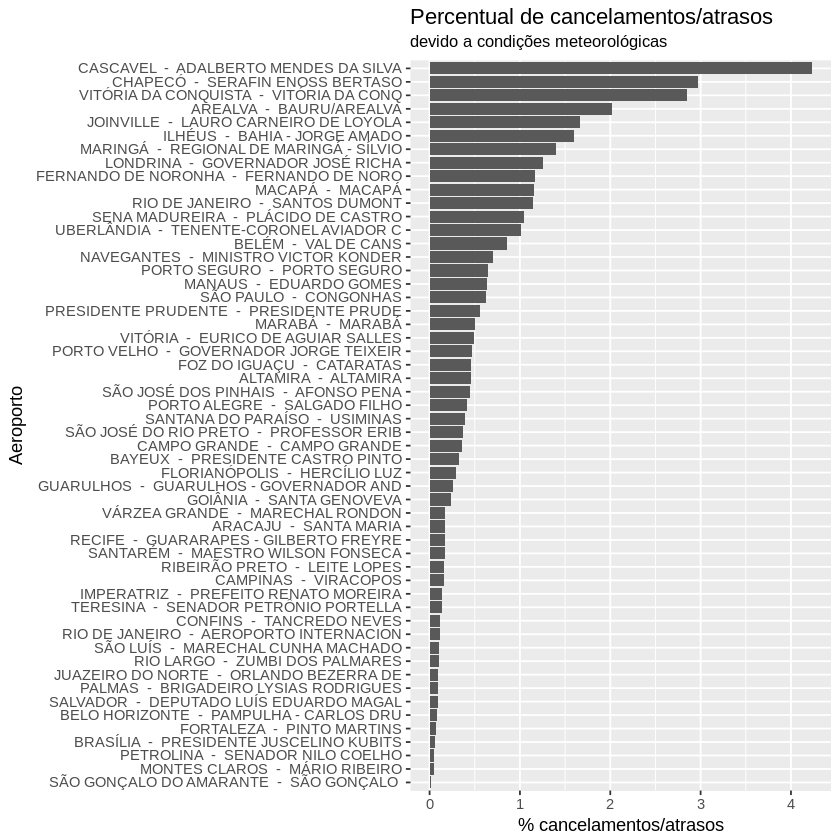

In [27]:
# Exibe o gráfico
# Exibe o gráfico
g = ggplot(ranking_aerop_atrasos, aes(x=reorder(Aeroporto,perc,sum ) , y=perc*100)) + 
    geom_bar(show.legend = TRUE, stat = "identity") +
    coord_flip()
g = g + ggtitle("Percentual de cancelamentos/atrasos", subtitle="devido a condições meteorológicas") +
        xlab("Aeroporto") +
        ylab("% cancelamentos/atrasos")
plot(g)

Análise de condições climáticas durante os eventos de atrasos/cancelamentos

In [30]:
# Top 50 com mais atrasos/cancelamentos
aerop_atrasos_top_50 = ranking_aerop_atrasos[1:10,1:2]
vrawu50 = vra

icao_origem,Aeroporto
SBCA,CASCAVEL - ADALBERTO MENDES DA SILVA
SBCH,CHAPECÓ - SERAFIN ENOSS BERTASO
SBQV,VITÓRIA DA CONQUISTA - VITÓRIA DA CONQ
SBAE,AREALVA - BAURU/AREALVA
SBJV,JOINVILLE - LAURO CARNEIRO DE LOYOLA
SBIL,ILHÉUS - BAHIA - JORGE AMADO
SBMG,MARINGÁ - REGIONAL DE MARINGÁ - SÍLVIO
SBLO,LONDRINA - GOVERNADOR JOSÉ RICHA
SBFN,FERNANDO DE NORONHA - FERNANDO DE NORO
SBMQ,MACAPÁ - MACAPÁ


In [ ]:
###################

In [1]:
# instala o pacote sqldf 
# INSTALLING FROM CRAN
# Executar apenas na primeira vez
install.packages("sqldf")

also installing the dependencies 'memoise', 'gsubfn', 'proto', 'RSQLite', 'chron'



package 'memoise' successfully unpacked and MD5 sums checked
package 'gsubfn' successfully unpacked and MD5 sums checked
package 'proto' successfully unpacked and MD5 sums checked
package 'RSQLite' successfully unpacked and MD5 sums checked
package 'chron' successfully unpacked and MD5 sums checked
package 'sqldf' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Flora\AppData\Local\Temp\RtmpKg5qLM\downloaded_packages


In [1]:
install.packages("data.table")
install.packages("DataExplorer")

library(data.table)
library(DataExplorer)

package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Flora\AppData\Local\Temp\Rtmpkjp5E0\downloaded_packages
package 'DataExplorer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Flora\AppData\Local\Temp\Rtmpkjp5E0\downloaded_packages


In [22]:
source("https://raw.githubusercontent.com/claudioteix/RLibrary/master/MyLibrary.R")

In [2]:
library(sqldf)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


In [3]:
# Carrega o dataset criado no RStudio no servidor CEFET
# já com todas as cláusulas de data cleaning 
load("flights.Rda")

In [3]:
nrow(df10)

[1] 53705

In [4]:
head(df10)

,destiny,arrival_expect_date,arrival_expect_hour,origin,depart_expect_date,depart_expect_hour,airline,flight,autho_code,line_type,...,depart_visibility,depart_events,depart_conditions,arrival_temperature,arrival_dew_point,arrival_humidity,arrival_pressure,arrival_visibility,arrival_events,arrival_conditions
335324,SBBE,2009-01-01,07:00,SBEG,2009-01-01,05:00,GLO,1697,0,N,...,10,,Mostly Cloudy,26,23,83,1010,10,,Mostly Cloudy
335331,SBBE,2009-01-01,12:00,SBBR,2009-01-01,10:00,TAM,3716,0,E,...,20,,Scattered Clouds,31,25,79,1011,10,Rain,Mostly Cloudy
335406,SBBE,2009-01-03,12:00,SBFZ,2009-01-03,10:00,TAM,3890,0,N,...,10,,Mostly Cloudy,32,22,55,1010,10,,Scattered Clouds
335412,SBBE,2009-01-03,13:00,SBBR,2009-01-03,11:00,GLO,1928,0,N,...,10,Thunderstorm,Thunderstorm,30,25,74,1010,10,,Scattered Clouds
335421,SBBE,2009-01-03,22:00,SBFZ,2009-01-03,20:00,GLO,1830,0,N,...,10,,Scattered Clouds,27,23,79,1008,10,,Partly Cloudy
335445,SBBE,2009-01-04,15:00,SBFZ,2009-01-04,13:00,TAM,3454,0,N,...,10,,Scattered Clouds,26,22,78,1008,20,Rain,Partly Cloudy


In [5]:
str(df10)

'data.frame':	53705 obs. of  37 variables:
 $ destiny            : Factor w/ 537 levels "CYYZ","EDDF",..: 48 48 48 48 48 48 48 48 48 48 ...
 $ arrival_expect_date: chr  "2009-01-01" "2009-01-01" "2009-01-03" "2009-01-03" ...
 $ arrival_expect_hour: chr  "07:00" "12:00" "12:00" "13:00" ...
 $ origin             : Factor w/ 522 levels "CYYZ","EDDF",..: 71 52 75 52 75 75 75 71 75 75 ...
 $ depart_expect_date : chr  "2009-01-01" "2009-01-01" "2009-01-03" "2009-01-03" ...
 $ depart_expect_hour : chr  "05:00" "10:00" "10:00" "11:00" ...
 $ airline            : Factor w/ 119 levels "AAL","ABJ","ACA",..: 28 60 60 28 28 60 67 60 28 28 ...
 $ flight             : Factor w/ 8250 levels "3","4","14","15",..: 564 1307 1411 734 666 1197 2009 1412 666 666 ...
 $ autho_code         : Factor w/ 11 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ line_type          : Factor w/ 10 levels "C","E","G","I",..: 6 2 6 6 6 6 4 6 6 6 ...
 $ depart_expect      : POSIXlt, format: "2009-01-01 05:50:00" "2009-

In [4]:
# Transforma o formato POSIXlt em chr
# para que possa ser trabalhado em conjunto com o sqldf
df10$depart_expect <- as.character(df10$depart_expect)
df10$depart <- as.character(df10$depart)
df10$arrival_expect <- as.character(df10$arrival_expect)
df10$arrival <- as.character(df10$arrival)

In [7]:
str(df10)

'data.frame':	53705 obs. of  37 variables:
 $ destiny            : Factor w/ 537 levels "CYYZ","EDDF",..: 48 48 48 48 48 48 48 48 48 48 ...
 $ arrival_expect_date: chr  "2009-01-01" "2009-01-01" "2009-01-03" "2009-01-03" ...
 $ arrival_expect_hour: chr  "07:00" "12:00" "12:00" "13:00" ...
 $ origin             : Factor w/ 522 levels "CYYZ","EDDF",..: 71 52 75 52 75 75 75 71 75 75 ...
 $ depart_expect_date : chr  "2009-01-01" "2009-01-01" "2009-01-03" "2009-01-03" ...
 $ depart_expect_hour : chr  "05:00" "10:00" "10:00" "11:00" ...
 $ airline            : Factor w/ 119 levels "AAL","ABJ","ACA",..: 28 60 60 28 28 60 67 60 28 28 ...
 $ flight             : Factor w/ 8250 levels "3","4","14","15",..: 564 1307 1411 734 666 1197 2009 1412 666 666 ...
 $ autho_code         : Factor w/ 11 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ line_type          : Factor w/ 10 levels "C","E","G","I",..: 6 2 6 6 6 6 4 6 6 6 ...
 $ depart_expect      : chr  "2009-01-01 05:50:00" "2009-01-01 10:20:

In [5]:
query<-"select destiny, origin, airline, flight, depart, arrival, departure_delay, arrival_delay,"
query<-paste(query,"depart_temperature, depart_dew_point, depart_humidity, depart_pressure, depart_visibility, depart_conditions,", sep=" ")
query<-paste(query,"arrival_temperature, arrival_dew_point, arrival_humidity, arrival_pressure, arrival_visibility, arrival_conditions", sep=" ")
query<-paste(query, "from df10", sep=" ")
print(query)

[1] "select destiny, origin, airline, flight, depart, arrival, departure_delay, arrival_delay, depart_temperature, depart_dew_point, depart_humidity, depart_pressure, depart_visibility, depart_conditions, arrival_temperature, arrival_dew_point, arrival_humidity, arrival_pressure, arrival_visibility, arrival_conditions from df10"


In [6]:
train_set<-sqldf(query)

In [10]:
str(train_set)

'data.frame':	53705 obs. of  20 variables:
 $ destiny            : Factor w/ 537 levels "CYYZ","EDDF",..: 48 48 48 48 48 48 48 48 48 48 ...
 $ origin             : Factor w/ 522 levels "CYYZ","EDDF",..: 71 52 75 52 75 75 75 71 75 75 ...
 $ airline            : Factor w/ 119 levels "AAL","ABJ","ACA",..: 28 60 60 28 28 60 67 60 28 28 ...
 $ flight             : Factor w/ 8250 levels "3","4","14","15",..: 564 1307 1411 734 666 1197 2009 1412 666 666 ...
 $ depart             : chr  "2009-01-01 06:51:00" "2009-01-01 11:25:00" "2009-01-03 11:18:00" "2009-01-03 12:04:00" ...
 $ arrival            : chr  "2009-01-01 09:00:00" "2009-01-01 14:02:00" "2009-01-03 13:06:00" "2009-01-03 14:46:00" ...
 $ departure_delay    : num  61 65 63 64 83 87 65 97 167 86 ...
 $ arrival_delay      : num  70 77 61 81 95 78 65 92 177 102 ...
 $ depart_temperature : num  22 24 29 25 27 31 28 31 27 27 ...
 $ depart_dew_point   : num  21 16 22 19 22 22 23 22 24 23 ...
 $ depart_humidity    : num  94 61 66 69 74 58 7

In [7]:
# Carrega as bibliotecas necessárias para trabalhar com as transações e os algoritmos
library("arules")
library("arulesSequences")
library("arulesViz")

Warning message:
"package 'arules' was built under R version 3.4.4"Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Warning message:
"package 'arulesSequences' was built under R version 3.4.4"Warning message:
"package 'arulesViz' was built under R version 3.4.4"Loading required package: grid


In [8]:
# Remove as características que não serão analisadas
train_set$depart_temperature <- NULL
train_set$depart_dew_point <- NULL
train_set$depart_humidity <- NULL
train_set$depart_pressure <- NULL
train_set$depart_visibility <- NULL
train_set$arrival_temperature <- NULL
train_set$arrival_dew_point <- NULL
train_set$arrival_humidity <- NULL
train_set$arrival_pressure <- NULL
train_set$arrival_visibility <- NULL

In [8]:
str(train_set)

'data.frame':	53705 obs. of  10 variables:
 $ destiny           : Factor w/ 537 levels "CYYZ","EDDF",..: 48 48 48 48 48 48 48 48 48 48 ...
 $ origin            : Factor w/ 522 levels "CYYZ","EDDF",..: 71 52 75 52 75 75 75 71 75 75 ...
 $ airline           : Factor w/ 119 levels "AAL","ABJ","ACA",..: 28 60 60 28 28 60 67 60 28 28 ...
 $ flight            : Factor w/ 8250 levels "3","4","14","15",..: 564 1307 1411 734 666 1197 2009 1412 666 666 ...
 $ depart            : chr  "2009-01-01 06:51:00" "2009-01-01 11:25:00" "2009-01-03 11:18:00" "2009-01-03 12:04:00" ...
 $ arrival           : chr  "2009-01-01 09:00:00" "2009-01-01 14:02:00" "2009-01-03 13:06:00" "2009-01-03 14:46:00" ...
 $ departure_delay   : num  61 65 63 64 83 87 65 97 167 86 ...
 $ arrival_delay     : num  70 77 61 81 95 78 65 92 177 102 ...
 $ depart_conditions : chr  "Mostly Cloudy" "Scattered Clouds" "Mostly Cloudy" "Thunderstorm" ...
 $ arrival_conditions: chr  "Mostly Cloudy" "Mostly Cloudy" "Scattered Clouds" "Scat

In [9]:
# cria duas listas com todos os valores da coluna depart (index column=5)
# já separados nos formatos YYYY-MM-DD e HH:MM:SS respectivamente
depart_d<-sapply(strsplit(train_set[,5], " ", fixed = TRUE), "[", 1)
depart_h<-sapply(strsplit(train_set[,5], " ", fixed = TRUE), "[", 2)

# cria duas listas com todos os valores da coluna arrival (index column=6)
# já separados nos formatos YYYY-MM-DD e HH:MM:SS respectivamente
arrival_d<-sapply(strsplit(train_set[,6], " ", fixed = TRUE), "[", 1)
arrival_h<-sapply(strsplit(train_set[,6], " ", fixed = TRUE), "[", 2)

# cria um novo dataframe com essas duas novas colunas
x <- data.frame("depart_date" = depart_d, "depart_time" = depart_h, "arrival_date" = arrival_d, "arrival_time" = arrival_h)

# cria um novo dataframe com a combinação do dataframe train_set e x
flights <- cbind(train_set,x)

In [15]:
str(flights)

'data.frame':	53705 obs. of  14 variables:
 $ destiny           : Factor w/ 537 levels "CYYZ","EDDF",..: 48 48 48 48 48 48 48 48 48 48 ...
 $ origin            : Factor w/ 522 levels "CYYZ","EDDF",..: 71 52 75 52 75 75 75 71 75 75 ...
 $ airline           : Factor w/ 119 levels "AAL","ABJ","ACA",..: 28 60 60 28 28 60 67 60 28 28 ...
 $ flight            : Factor w/ 8250 levels "3","4","14","15",..: 564 1307 1411 734 666 1197 2009 1412 666 666 ...
 $ depart            : chr  "2009-01-01 06:51:00" "2009-01-01 11:25:00" "2009-01-03 11:18:00" "2009-01-03 12:04:00" ...
 $ arrival           : chr  "2009-01-01 09:00:00" "2009-01-01 14:02:00" "2009-01-03 13:06:00" "2009-01-03 14:46:00" ...
 $ departure_delay   : num  61 65 63 64 83 87 65 97 167 86 ...
 $ arrival_delay     : num  70 77 61 81 95 78 65 92 177 102 ...
 $ depart_conditions : chr  "Mostly Cloudy" "Scattered Clouds" "Mostly Cloudy" "Thunderstorm" ...
 $ arrival_conditions: chr  "Mostly Cloudy" "Mostly Cloudy" "Scattered Clouds" "Scat

In [16]:
head(flights)

destiny,origin,airline,flight,depart,arrival,departure_delay,arrival_delay,depart_conditions,arrival_conditions,depart_date,depart_time,arrival_date,arrival_time
SBBE,SBEG,GLO,1697,2009-01-01 06:51:00,2009-01-01 09:00:00,61,70,Mostly Cloudy,Mostly Cloudy,2009-01-01,06:51:00,2009-01-01,09:00:00
SBBE,SBBR,TAM,3716,2009-01-01 11:25:00,2009-01-01 14:02:00,65,77,Scattered Clouds,Mostly Cloudy,2009-01-01,11:25:00,2009-01-01,14:02:00
SBBE,SBFZ,TAM,3890,2009-01-03 11:18:00,2009-01-03 13:06:00,63,61,Mostly Cloudy,Scattered Clouds,2009-01-03,11:18:00,2009-01-03,13:06:00
SBBE,SBBR,GLO,1928,2009-01-03 12:04:00,2009-01-03 14:46:00,64,81,Thunderstorm,Scattered Clouds,2009-01-03,12:04:00,2009-01-03,14:46:00
SBBE,SBFZ,GLO,1830,2009-01-03 22:03:00,2009-01-03 23:55:00,83,95,Scattered Clouds,Partly Cloudy,2009-01-03,22:03:00,2009-01-03,23:55:00
SBBE,SBFZ,TAM,3454,2009-01-04 15:04:00,2009-01-04 16:53:00,87,78,Scattered Clouds,Partly Cloudy,2009-01-04,15:04:00,2009-01-04,16:53:00


In [10]:
# Remove as características que não serão analisadas
flights$depart <- NULL
flights$arrival <- NULL

In [11]:
str(flights)

'data.frame':	53705 obs. of  12 variables:
 $ destiny           : Factor w/ 537 levels "CYYZ","EDDF",..: 48 48 48 48 48 48 48 48 48 48 ...
 $ origin            : Factor w/ 522 levels "CYYZ","EDDF",..: 71 52 75 52 75 75 75 71 75 75 ...
 $ airline           : Factor w/ 119 levels "AAL","ABJ","ACA",..: 28 60 60 28 28 60 67 60 28 28 ...
 $ flight            : Factor w/ 8250 levels "3","4","14","15",..: 564 1307 1411 734 666 1197 2009 1412 666 666 ...
 $ departure_delay   : num  61 65 63 64 83 87 65 97 167 86 ...
 $ arrival_delay     : num  70 77 61 81 95 78 65 92 177 102 ...
 $ depart_conditions : chr  "Mostly Cloudy" "Scattered Clouds" "Mostly Cloudy" "Thunderstorm" ...
 $ arrival_conditions: chr  "Mostly Cloudy" "Mostly Cloudy" "Scattered Clouds" "Scattered Clouds" ...
 $ depart_date       : Factor w/ 3220 levels "2009-01-01","2009-01-02",..: 1 1 3 3 3 4 5 5 5 6 ...
 $ depart_time       : Factor w/ 1440 levels "00:00:00","00:01:00",..: 412 686 679 725 1324 905 576 1063 1408 1327 ...
 $ a

In [23]:
introduce(flights)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,total_observations,memory_usage
53705,12,10,2,0,1768,644460,4569752


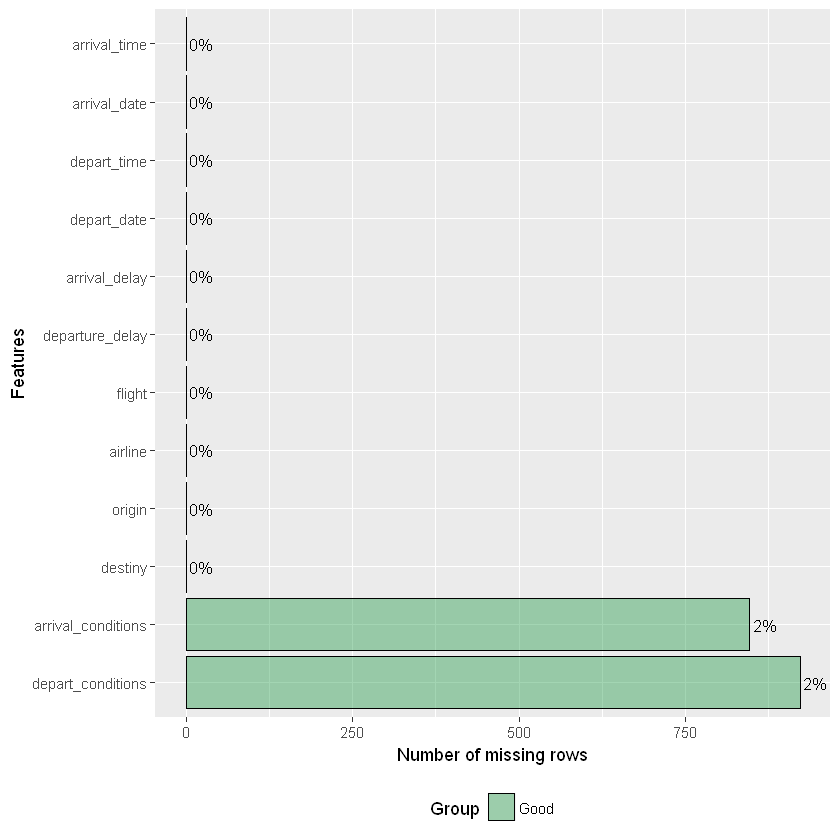

In [25]:
PlotMissing(flights)

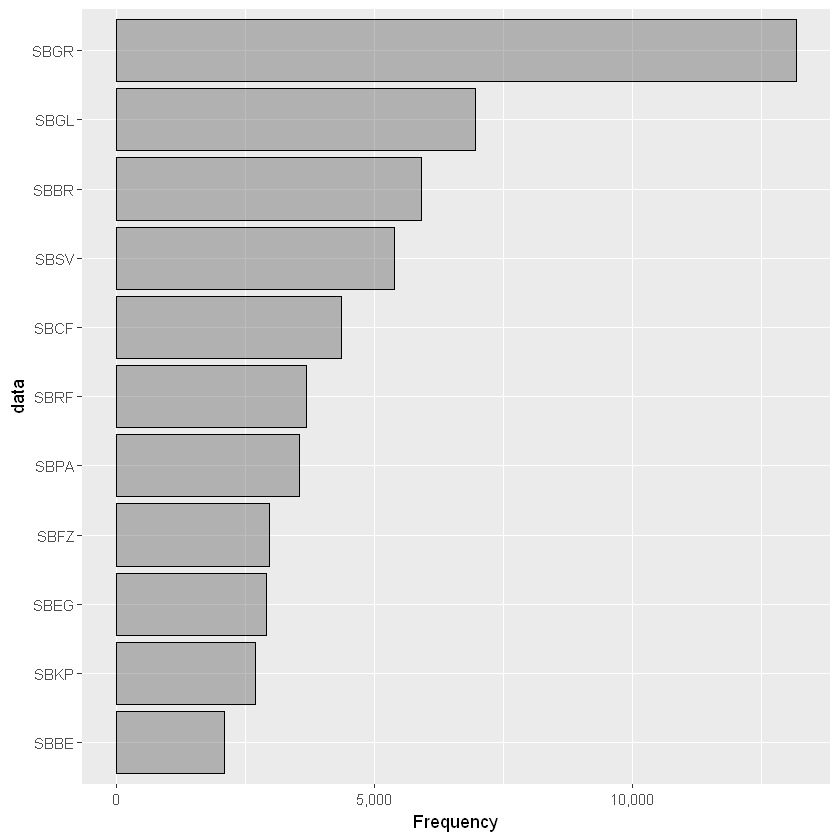

In [29]:
BarDiscrete(flights$origin)

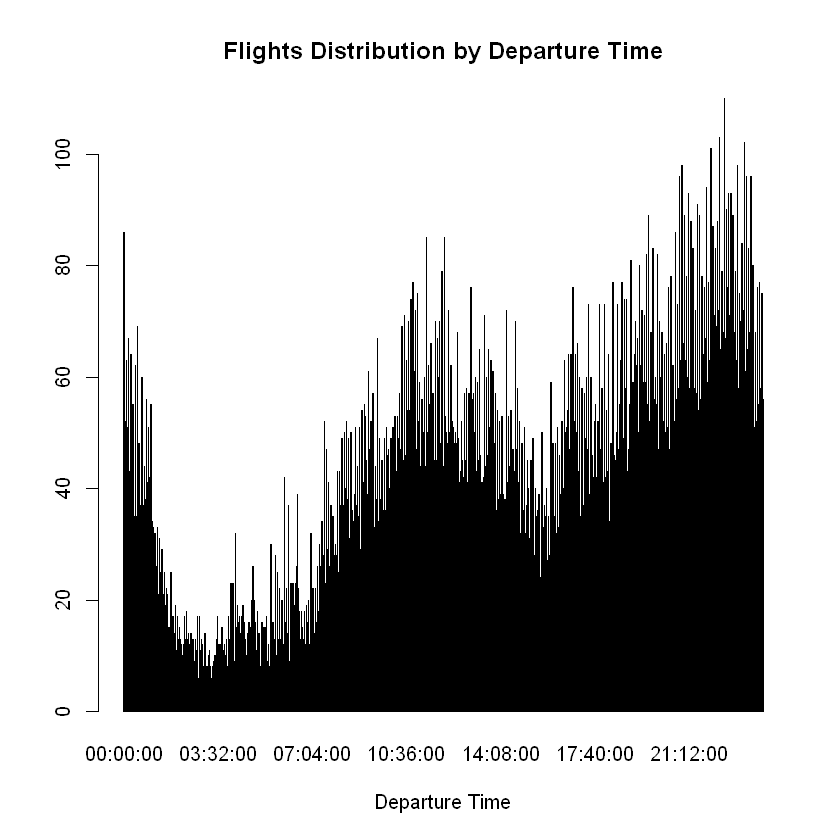

In [36]:
counts <- table(flights$depart_time)
barplot(counts, main="Flights Distribution by Departure Time", 
  	xlab="Departure Time")

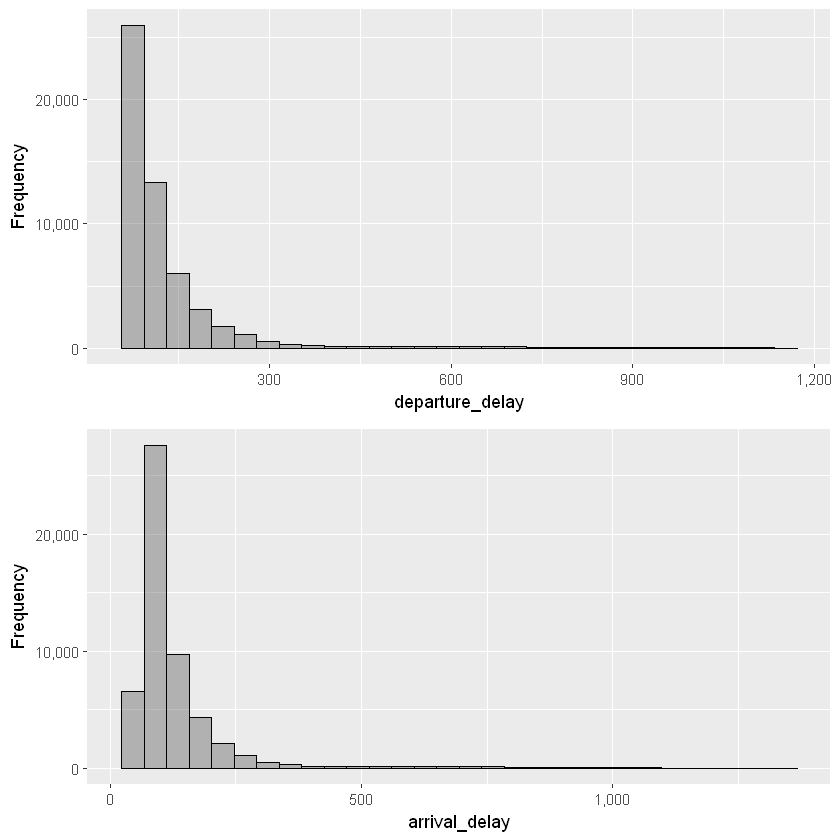

In [32]:
HistogramContinuous(flights)

8 columns ignored with more than 20 categories.
airline: 37 categories
flight: 2519 categories
depart_conditions: 32 categories
arrival_conditions: 34 categories
depart_date: 3220 categories
depart_time: 1440 categories
arrival_date: 3214 categories
arrival_time: 1440 categories



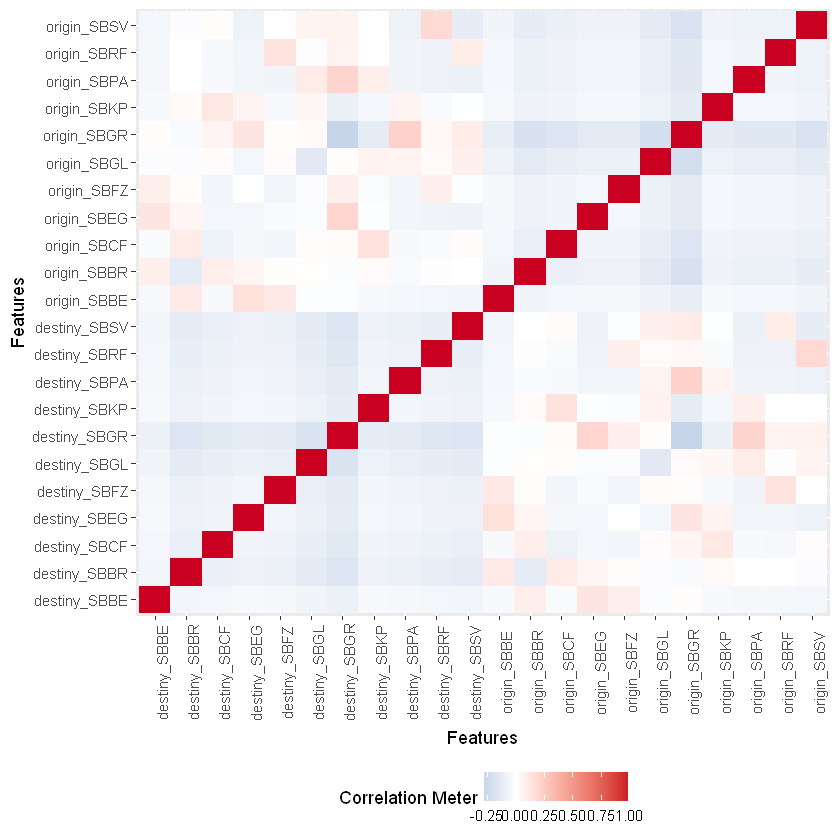

In [33]:
CorrelationDiscrete(flights)

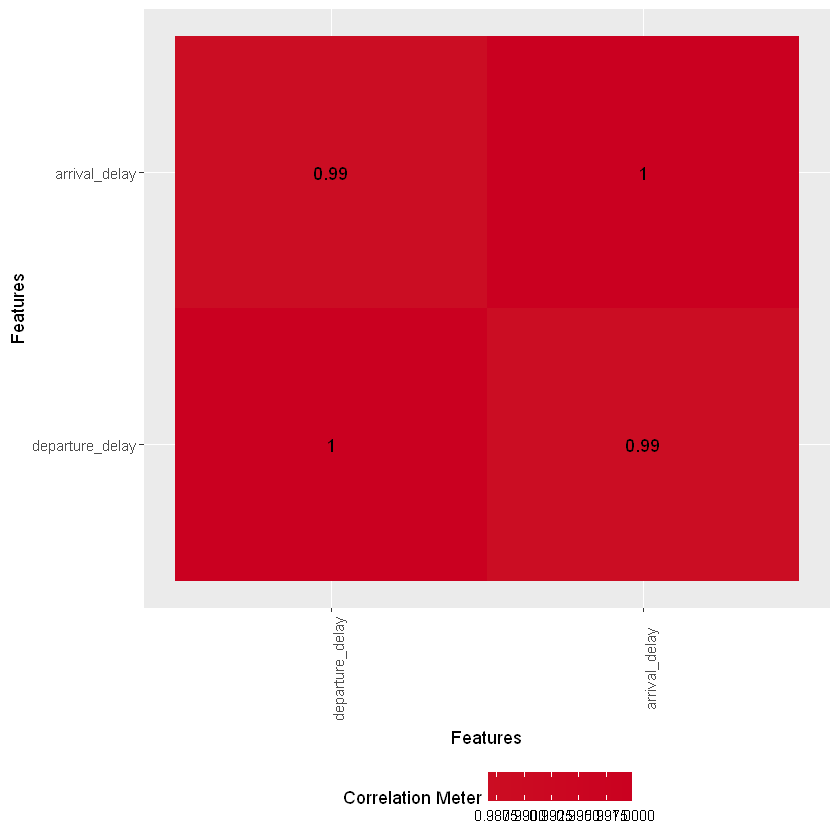

In [34]:
CorrelationContinuous(flights)

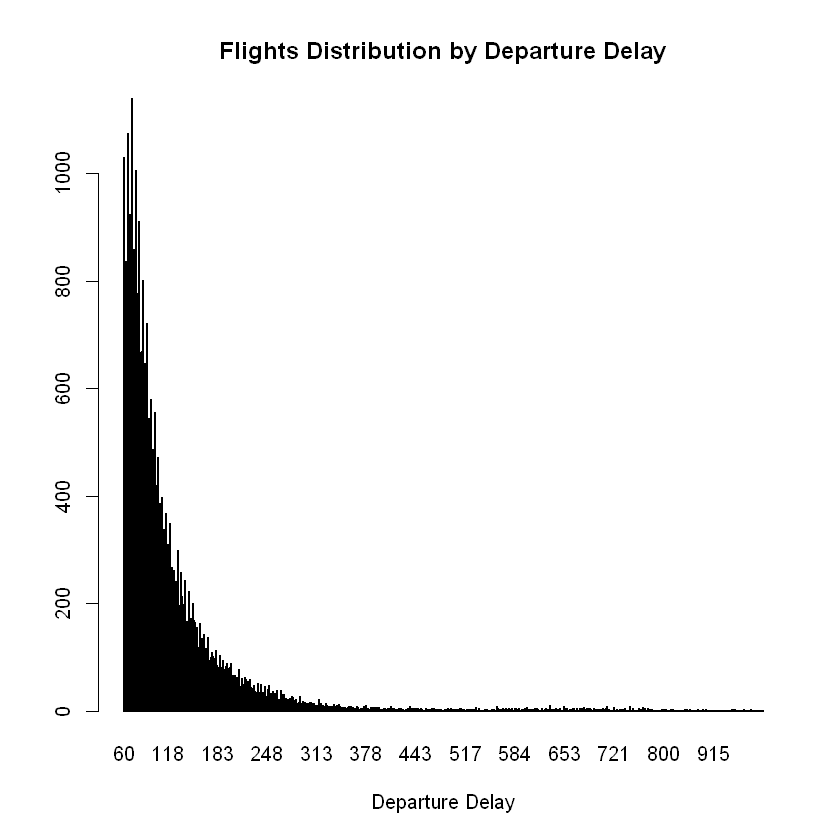

In [37]:
counts <- table(flights$departure_delay)
barplot(counts, main="Flights Distribution by Departure Delay", 
  	xlab="Departure Delay")

In [68]:
# Sum the flights delayed by departure time (HH)
query<-"select depart_time_HH, count(flight) as total_flights
        from (select substr(depart_time,1,2) as depart_time_HH, flight
              from   flights) 
        group by depart_time_HH
        order by total_flights"
print(query)

[1] "select depart_time_HH, count(flight) as total_flights\n        from (select substr(depart_time,1,2) as depart_time_HH, flight\n              from   flights) \n        group by depart_time_HH\n        order by total_flights"


In [69]:
result<-sqldf(query)

In [70]:
result

depart_time_HH,total_flights
03,531
02,600
05,648
04,810
06,895
01,1208
07,1370
15,1774
08,2028
09,2305


In [19]:
# Analisa a estatística descritiva das características departure_delay e arrival_delay que serão categorizadas
summary(flights$departure_delay)
summary(flights$arrival_delay)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0    75.0    94.0   124.7   135.0  1138.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0    75.0    95.0   125.8   135.0  1360.0 

In [76]:
flights$depart_conditions <- as.factor(flights$depart_conditions)
flights$arrival_conditions <- as.factor(flights$arrival_conditions)

In [21]:
str(flights)

'data.frame':	53705 obs. of  12 variables:
 $ destiny           : Factor w/ 537 levels "CYYZ","EDDF",..: 48 48 48 48 48 48 48 48 48 48 ...
 $ origin            : Factor w/ 522 levels "CYYZ","EDDF",..: 71 52 75 52 75 75 75 71 75 75 ...
 $ airline           : Factor w/ 119 levels "AAL","ABJ","ACA",..: 28 60 60 28 28 60 67 60 28 28 ...
 $ flight            : Factor w/ 8250 levels "3","4","14","15",..: 564 1307 1411 734 666 1197 2009 1412 666 666 ...
 $ departure_delay   : num  61 65 63 64 83 87 65 97 167 86 ...
 $ arrival_delay     : num  70 77 61 81 95 78 65 92 177 102 ...
 $ depart_conditions : Factor w/ 31 levels " ","\xc2","Clear",..: 16 24 16 27 24 24 16 24 19 19 ...
 $ arrival_conditions: Factor w/ 33 levels " ","\xc2","Clear",..: 20 20 27 27 23 23 27 20 20 29 ...
 $ depart_date       : Factor w/ 3220 levels "2009-01-01","2009-01-02",..: 1 1 3 3 3 4 5 5 5 6 ...
 $ depart_time       : Factor w/ 1440 levels "00:00:00","00:01:00",..: 412 686 679 725 1324 905 576 1063 1408 1327 ...
 $ a

**Departure Time** is a key factor that we are going to examine.<br>
We want to know which time is the best time for flight.

In [71]:
## Categoriza as variáveis departure_delay e arrival_delay
flights$departure_delay <- ordered(cut(flights$departure_delay, c(60,75,125,240)),
                              labels = c("None", "Low", "High"))

flights$arrival_delay <- ordered(cut(flights$arrival_delay, c(60,75,125,240)),
                              labels = c("None", "Low", "High"))


In [73]:
## Categoriza a variável depart_time
flights$depart_time <- ordered(cut(as.integer(substr(flights$depart_time,1,2)), c(00,06,12,18,23)),
                              labels = c("Overnight", "Morning", "Afternoon", "Evening"))


In [74]:
head(flights)

destiny,origin,airline,flight,departure_delay,arrival_delay,depart_conditions,arrival_conditions,depart_date,depart_time,arrival_date,arrival_time
SBBE,SBEG,GLO,1697,None,None,Mostly Cloudy,Mostly Cloudy,2009-01-01,Overnight,2009-01-01,09:00:00
SBBE,SBBR,TAM,3716,None,Low,Scattered Clouds,Mostly Cloudy,2009-01-01,Morning,2009-01-01,14:02:00
SBBE,SBFZ,TAM,3890,None,None,Mostly Cloudy,Scattered Clouds,2009-01-03,Morning,2009-01-03,13:06:00
SBBE,SBBR,GLO,1928,None,Low,Thunderstorm,Scattered Clouds,2009-01-03,Morning,2009-01-03,14:46:00
SBBE,SBFZ,GLO,1830,Low,Low,Scattered Clouds,Partly Cloudy,2009-01-03,Evening,2009-01-03,23:55:00
SBBE,SBFZ,TAM,3454,Low,Low,Scattered Clouds,Partly Cloudy,2009-01-04,Afternoon,2009-01-04,16:53:00


In [107]:
# Sum the flights delayed during Overnight
query<-"select count(flight) from flights where depart_time='Overnight'"
print(query)

[1] "select count(flight) from flights where depart_time='Overnight'"


In [108]:
result<-sqldf(query)

In [109]:
result

count(flight)
4692


In [115]:
# Sum the flights delayed during Overnight and departure_delay='None'
query<-"select count(flight) from flights where depart_time='Overnight' and departure_delay='None'"
print(query)

[1] "select count(flight) from flights where depart_time='Overnight' and departure_delay='None'"


In [116]:
result_2<-sqldf(query)

In [117]:
result_2

count(flight)
900


Confidence = 0,1918 ou 19,18%

In [118]:
# Sum the flights delayed during Morning
query<-"select count(flight) from flights where depart_time='Morning'"
result_3<-sqldf(query)
result_3

count(flight)
14206


In [119]:
# Sum the flights delayed during Morning and departure_delay='None'
query<-"select count(flight) from flights where depart_time='Morning' and departure_delay='None'"
result_4<-sqldf(query)
result_4

count(flight)
3358


Confidence = 0,2363 ou 23,63%

In [121]:
# Sum the flights delayed during Afternoon
query<-"select count(flight) from flights where depart_time='Afternoon'"
result_5<-sqldf(query)
result_5

count(flight)
14573


In [122]:
# Sum the flights delayed during Afternoon and departure_delay='None'
query<-"select count(flight) from flights where depart_time='Afternoon' and departure_delay='None'"
result_6<-sqldf(query)
result_6

count(flight)
3689


Confidence = 0,2531 ou 25,31%

In [123]:
# Sum the flights delayed during Evening
query<-"select count(flight) from flights where depart_time='Evening'"
result_7<-sqldf(query)
result_7

count(flight)
17756


In [125]:
# Sum the flights delayed during Evening and departure_delay='None'
query<-"select count(flight) from flights where depart_time='Evening' and departure_delay='None'"
result_8<-sqldf(query)
result_8

count(flight)
4882


Confidence = 0,2749 ou 27,49%

**Flights Departed Without Delay**<br>
**Period of Time**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**(%)**<br>
Overnight
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
19,18%<br>
Morning
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
23,63%<br>
Afternoon
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
25,31%<br>
<span style="color:blue">
Evening
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
27,49%</span><br>
<br><br>
**Conclusion:** The best time period to flight is from 19H to 23H (Evening)

Creating the transactions and running the Apriori Algorithm,
we have the same results.

In [124]:
## Cria as transações
train_set_transactions <- as(flights, "transactions")

In [78]:
train_set_transactions

transactions in sparse format with
 53705 transactions (rows) and
 17376 items (columns)

In [79]:
str(train_set_transactions)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:631382] 47 607 1086 1741 9428 9431 9449 9484 9498 12718 ...
  .. .. ..@ p       : int [1:53706] 0 12 24 36 48 60 72 84 96 108 ...
  .. .. ..@ Dim     : int [1:2] 17376 53705
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	17376 obs. of  3 variables:
  .. ..$ labels   : chr [1:17376] "destiny=CYYZ" "destiny=EDDF" "destiny=EDDM" "destiny=EGLL" ...
  .. ..$ variables: Factor w/ 12 levels "airline","arrival_conditions",..: 10 10 10 10 10 10 10 10 10 10 ...
  .. ..$ levels   : Factor w/ 13634 levels " ","\xc2","0",..: 12949 12963 12964 12977 12983 12988 12995 12996 13004 13020 ...
  ..@ itemsetInfo:'data.frame':	53705 obs. of  1 variable:
  .. ..$ transactionID: chr [1:53705] "1" "2" "3" "4" ...


In [80]:
head(train_set_transactions@data)
head(train_set_transactions@itemInfo)
head(train_set_transactions@itemsetInfo)

6 x 53705 sparse Matrix of class "ngCMatrix"
                                                                               
[1,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[2,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[3,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[4,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[5,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[6,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......

 .....suppressing columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

labels,variables,levels
destiny=CYYZ,destiny,CYYZ
destiny=EDDF,destiny,EDDF
destiny=EDDM,destiny,EDDM
destiny=EGLL,destiny,EGLL
destiny=EHAM,destiny,EHAM
destiny=ELLX,destiny,ELLX


transactionID
1
2
3
4
5
6


In [127]:
# Nesta parte do trabalho, executar-se-á o algoritmo APRIORI
# para gerar regras com a seguinte especificcação:
#
# 1. com suporte de 0,5, confiança de 0,9 e tamanho minimo = 2
# 2. com um atributo do lado esquerdo e um do lado direito e tamanho maximo=3
# 3. com lado direito limitado ao valor do atributo arrival_delay=None Arrival Delay
# 4. e lado esquerdo livre.
#
# Isso significa que estamos interessados em qualquer causa que provoque
# a consequência arrival_delay=High Arrival Delay. 
#rules <- apriori(train_set_transactions, parameter=list(supp = 0.01, conf = 0.8, minlen=1, maxlen= 10, target = "rules"), appearance=list(rhs = c("arrival_delay=High"),default="lhs"),control=NULL)
#rules <- apriori(train_set_transactions, parameter=list(conf = 0.9, minlen=1, maxlen= 10, target = "rules"), appearance=list(rhs = c("arrival_delay=None"),default="lhs"),control=NULL)
#rules <- apriori(train_set_transactions, parameter = list(supp = 0.9, conf = 0.9, target = "rules"), appearance=list(rhs = c("arrival_delay=High"),default="lhs"),control=NULL)
rules <- apriori(train_set_transactions, parameter = list(supp = 0.01, conf = 0.1, target = "rules"), appearance=list(lhs = c("depart_time=Evening"), rhs = c("departure_delay=None")),control=NULL)
rules_a <- as(rules, "data.frame")
head(rules_a)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 537 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[2 item(s), 53705 transaction(s)] done [0.07s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.03s].
checking subsets of size 1 2 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


rules,support,confidence,lift,count
{} => {departure_delay=None},0.24789126,0.2478913,1.000000,13313
{depart_time=Evening} => {departure_delay=None},0.09090401,0.2749493,1.109153,4882


In [128]:
irules <- inspect(rules)

    lhs                      rhs                    support    confidence
[1] {}                    => {departure_delay=None} 0.24789126 0.2478913 
[2] {depart_time=Evening} => {departure_delay=None} 0.09090401 0.2749493 
    lift     count
[1] 1.000000 13313
[2] 1.109153  4882


In [129]:
rules.sorted <- sort(rules, by="lift")
inspect(rules.sorted)

    lhs                      rhs                    support    confidence
[1] {depart_time=Evening} => {departure_delay=None} 0.09090401 0.2749493 
[2] {}                    => {departure_delay=None} 0.24789126 0.2478913 
    lift     count
[1] 1.109153  4882
[2] 1.000000 13313


Interpretando o resultado da primeira regra, temos:

SUPPORT = 0,015 significa que 1,5% das 53.705 transações, representam o padrão {airline=WEB, departure_delay=High}

CONFIDENCE = 0,92 significa que 92% das 53.705 transações que contém o padrão {airline=WEB, departure_delay=High} também contém o padrão {arrival_delay=High}

O lift de uma regra de associação A Þ B indica o quanto 
mais  freqüente  torna-se B, quando A ocorre.

Esta  medida  é  computada  por: 
Lift(A Þ B) = Conf(A Þ B) ÷ Sup(B). 

Indica que quando ocorre um voo com o padrão {airline=WEB, departure_delay=High} existe chance 4(quatro) vezes maior de ocorrer o padrão {arrival_delay=High}

{arrival_delay=High} significa um atraso entre 2 até 4 horas.

In [4]:
#################################

In [2]:
message=FALSE #supress warning
load("dataset/vrawu17.RData")

# Analisando os atrasos de partida

Para esta análise utilizaremos atrasos, de voos realizados, em um intervalo de 15m até 4h, pois são os atrasos mais comuns, os maiores que 4 horas apresentão consequências mais severas as empresas de aviação, de acordo com a ANAC as empresas tem que tomar as seguintes providências:

> - **A partir de 1 hora**: comunicação (internet, telefonemas, etc).
>- **A partir de 2 horas**: alimentação (voucher, lanche, bebidas, etc).
>- **A partir de 4 horas**: acomodação ou hospedagem (se for o caso) e transporte do aeroporto ao local de acomodação. Se você estiver no local de seu domicílio, a empresa poderá oferecer apenas o transporte para sua residência e desta para o aeroporto.


> **O passageiro pode solicitar reembolso quando ocorrer:**
> - a) Atraso do voo por mais de quatro horas;



Fonte: http://www.anac.gov.br/assuntos/passageiros/atrasos-cancelamento-e-pretericao-de-embarque

In [3]:
atrasos = vrawu17[vrawu17$atraso_partida >15 & 
                  vrawu17$atraso_partida <240 & 
                  vrawu17$situacao_voo=="REALIZADO",]

#### Top 5 aeroportos em contagem de atrasos de partida no brasil

In [12]:
library(dplyr) #%>%
vw_g = atrasos[c("icao_origem")]
vw_g = vw_g %>% group_by(icao_origem) %>% summarize(Count = n())
head(vw_g[order(-vw_g$Count),])

icao_origem,Count
NA,62116
SBGR,20136
SBSP,13643
SBBR,8069
SBKP,6669
SBGL,6374


##### Atrasos no aeroporto de guarulhos
Era de se esperar que o aeroporto de guarulhos 'SBGR' tenha a maior quantidades de atrasos visto que é o maior também em quantidade de voos. Iremos dar aqui um destaque maior para este em específico.

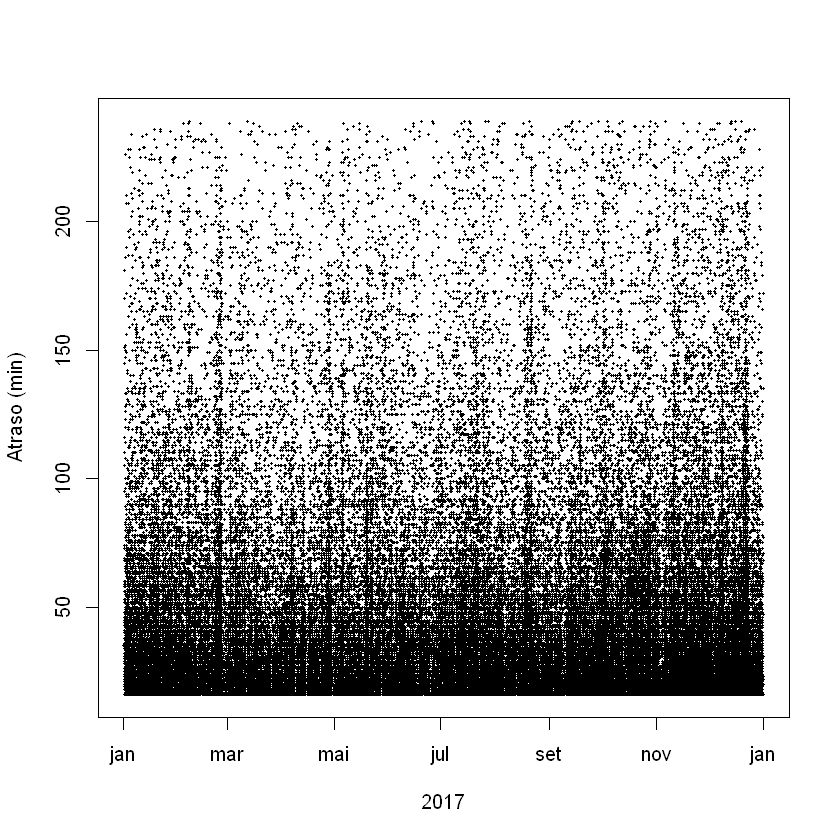

In [13]:
x = atrasos$partida_real
y = atrasos$atraso_partida
plot(x,y,pch=16 , cex=0.3, ylab='Atraso (min)', xlab='2017')

Podemos notar neste gráfico que existe uma concentração maior no período de férias escolares, entre dezembro e fevereiro. Também é interessante notar algumas 'linhas' em datas específicas, isso pode ser explciado com algum feríado ou possívelmente algum problema que tenha ocorrido no aeroporto. Ex:

 - Final de ferereiro - onde acontece o carnaval (dia 28), 
 - Final de abril que pode ser explicado pelo dia do trabalhador em primeiro de maio (segunda feira)

### Histograma de atrasos de partida

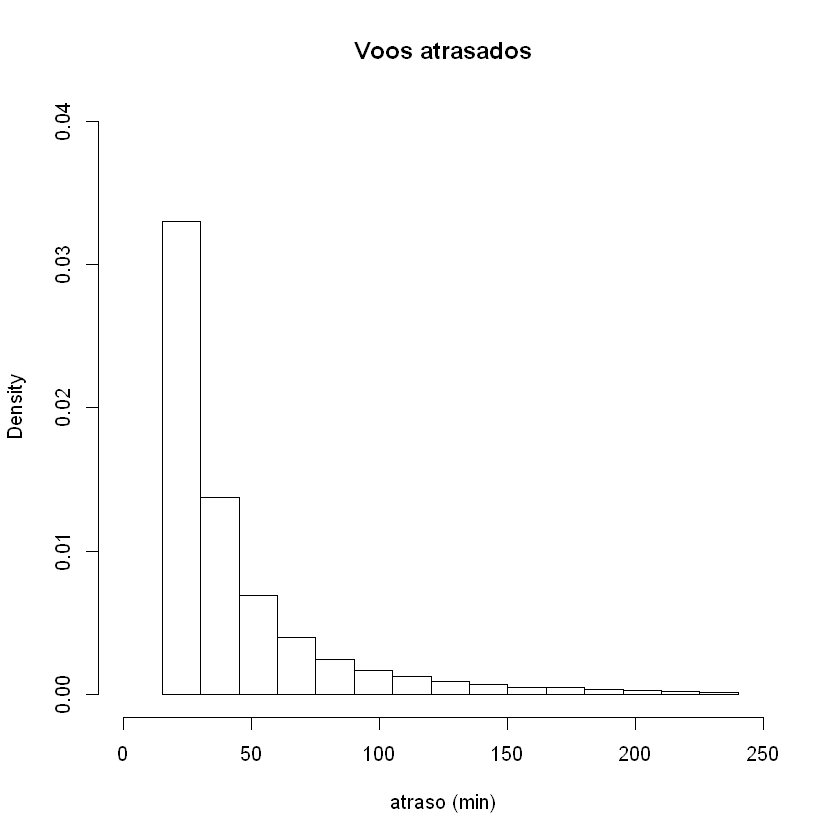

In [14]:
hist(as.numeric(atrasos$atraso_partida)
     ,breaks=seq(15,240,15)
     ,ylim=c(0,0.04)
     ,xlim=c(0,250)
     ,xlab="atraso (min)"
     ,main="Voos atrasados"
     ,freq=FALSE
     )

#### Histograma de horas mais comuns de voos com atraso

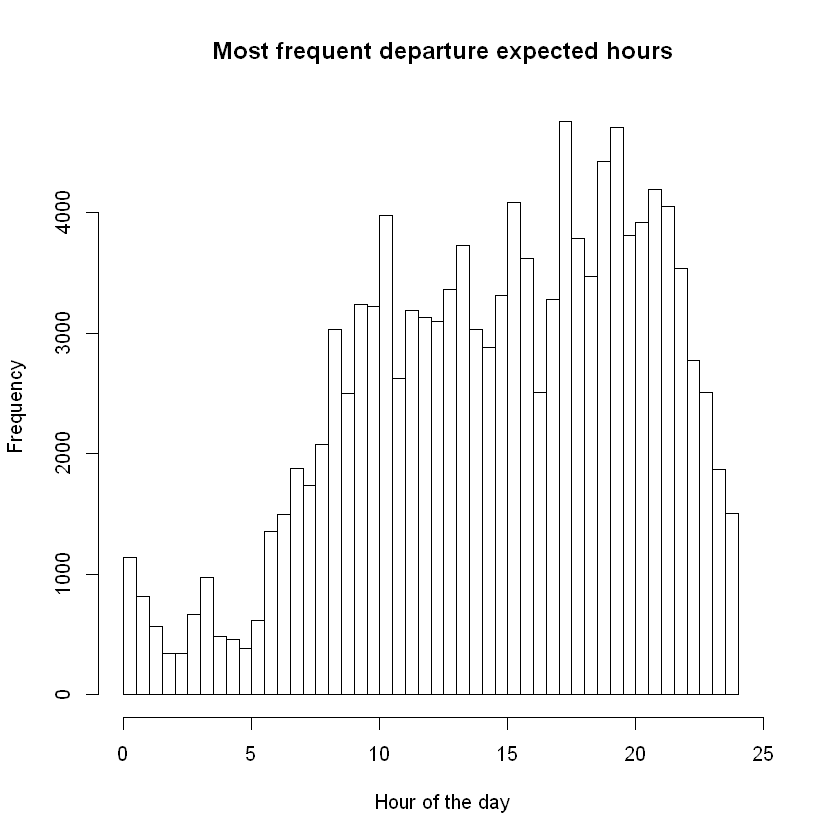

In [15]:
deh = as.POSIXlt(atrasos$partida_prevista)

h=hist(deh$hour+deh$min/60
     ,breaks=seq(0, 24, 0.5)
     ,xlim=c(0,25)
     ,xlab="Hour of the day"
     ,main="Most frequent departure expected hours"
     )
rm(deh)

#### Horas do dia com maior atraso (** tem que ajustar o gráfico, tem a janela de 1 da manhã que é pulada**)

Para essa análise foi usado os dados inclusive que tiveram atraso, apenas foi retirado os voos adiantados (atraso negativo), pois essa análise tem como objetivo encontrar quais horários são mais propensos a atraso, para entender qual horário deve ser evitado pelo passageiro na hora de comprar uma passagem.

A fim de evitar atrasos tentamos entender melhor qual hora do dia os voos costumam atrasar mais, para isso pegamos os horários de partida previsto e verificamos em média quanto tempo voos nessa hora costumam atrasar

In [12]:
library(dplyr) #%>%
d_h = vrawu17[,c('partida_prevista','atraso_partida')]
d_h = d_h[rowSums(is.na(d_h))==0,]
d_h = d_h[d_h$atraso_partida>=0,]

d_h$por_hora_tempo_partida=cut(as.integer(format(d_h$partida_prevista, "%H")), seq(0,24,1), include.lowest=TRUE, labels=seq(0,23,1))  #seq(0,23,1) )
d_h = d_h %>% group_by(por_hora_tempo_partida) %>% summarize(avg = mean(atraso_partida))

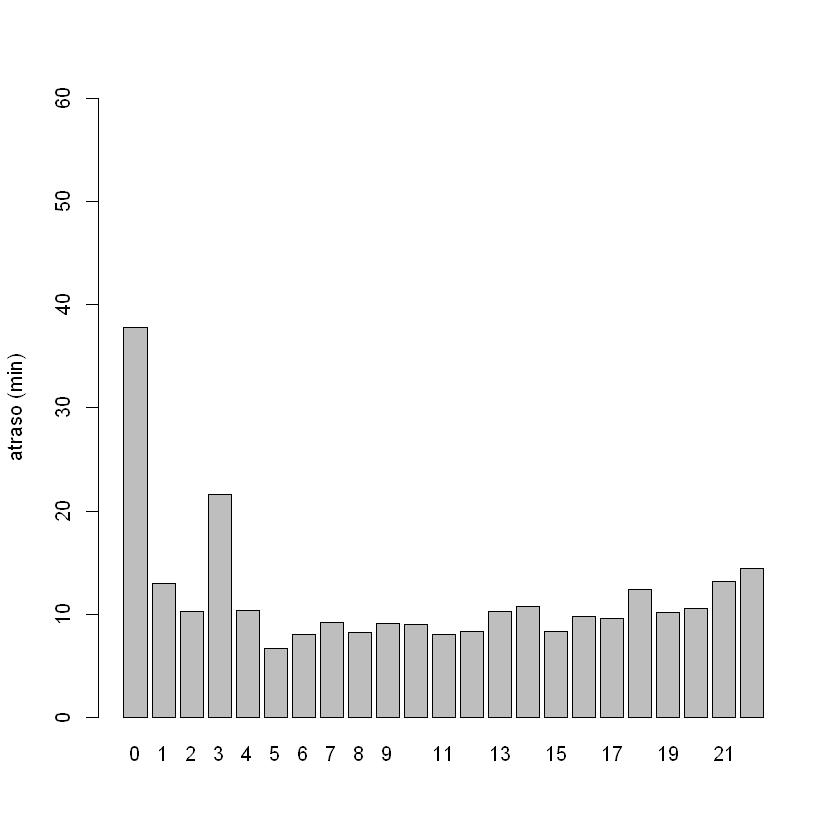

In [13]:
barplot(as.numeric(d_h$avg),names.arg=seq(0,22,1), ylim=c(0,60), ylab='atraso (min)')
rm(d_h)

### Densidade de distribuição PROBLEMA

In [3]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphics.R")
library(RColorBrewer)
library(gridExtra)

col.set <- brewer.pal(11, 'Spectral')
mycolors <- col.set[seq(0,36,1)]#c(1,3,5,7,9,11)]

value=vrawu17[vrawu17$atraso_partida >=15 & vrawu17$atraso_partida <=240,]
series <- data.frame(variable=value$origem_condicoes, value=value$atraso_partida)
grfB <- plot.density(series, colors=mycolors)

options(repr.plot.width=10, repr.plot.height=4)
grid.arrange( grfB, ncol=2)
#summary(vrawu17)

Loading required package: ggplot2
Loading required package: scales
Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.
Warning message:
"Removed 175560 rows containing non-finite values (stat_density)."

ERROR: Error in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)): entrada inválida 'Â' em 'utf8towcs'


In [14]:
vrawu17$origem_condicoes[1:100]
vrawu17$origem_condicoes[96] == "\xc2"

[1] "Partly Cloudy"                "Scattered Clouds"            
  [3] "Clear"                        "Clear"                       
  [5] "Mostly Cloudy"                NA                            
  [7] "Smoke"                        "Clear"                       
  [9] NA                             "Clear"                       
 [11] "Partly Cloudy"                "Partly Cloudy"               
 [13] NA                             "Clear"                       
 [15] "Unknown"                      "Clear"                       
 [17] "Light Rain"                   NA                            
 [19] NA                             "Clear"                       
 [21] "Partly Cloudy"                "Scattered Clouds"            
 [23] "Scattered Clouds"             "Scattered Clouds"            
 [25] "Clear"                        NA                            
 [27] "Clear"                        NA                            
 [29] "Clear"                        "Scattered Clouds"            
 [31] NA                             "Clear"                       
 [33] NA                             "Clear"                       
 [35] "Light Thunderstorms and Rain" "Clear"                       
 [37] "Partly Cloudy"                NA                            
 [39] NA                             NA                            
 [41] NA                             "Clear"                       
 [43] NA                             "<c2>"                        
 [45] "Clear"                        "<c2>"                        
 [47] NA                             "Clear"                       
 [49] "Clear"                        "Thunderstorm"                
 [51] "Clear"                        NA                            
 [53] NA                             "<c2>"                        
 [55] "Scattered Clouds"             "<c2>"                        
 [57] "Clear"                        "Clear"                       
 [59] "Clear"                        "Clear"                       
 [61] NA                             "Clear"                       
 [63] "<c2>"                         NA                            
 [65] "Clear"                        NA                            
 [67] "Scattered Clouds"             "Scattered Clouds"            
 [69] "Partly Cloudy"                "Mostly Cloudy"               
 [71] "<c2>"                         "Clear"                       
 [73] "Clear"                        "Clear"                       
 [75] "Clear"                        "Clear"                       
 [77] "<c2>"                         " "                           
 [79] "Scattered Clouds"             "Clear"                       
 [81] "Mostly Cloudy"                "Clear"                       
 [83] "Scattered Clouds"             NA                            
 [85] "Clear"                        NA                            
 [87] "Scattered Clouds"             "<c2>"                        
 [89] "Mostly Cloudy"                "Clear"                       
 [91] "Scattered Clouds"             NA                            
 [93] "Clear"                        NA                            
 [95] "Scattered Clouds"             "<c2>"                        
 [97] "Clear"                        "Partly Cloudy"               
 [99] "Scattered Clouds"             "Clear"

[1] FALSE

In [4]:
library(stringr)
usableText=str_replace_all(vrawu17$origem_condicoes,"[^[:graph:]]", "NA")

In [6]:
usableText[1:100] == '\xc2'

[1] FALSE FALSE FALSE FALSE FALSE    NA FALSE FALSE    NA FALSE FALSE FALSE
 [13]    NA FALSE FALSE FALSE FALSE    NA    NA FALSE FALSE FALSE FALSE FALSE
 [25] FALSE    NA FALSE    NA FALSE FALSE    NA FALSE    NA FALSE FALSE FALSE
 [37] FALSE    NA    NA    NA    NA FALSE    NA FALSE FALSE FALSE    NA FALSE
 [49] FALSE FALSE FALSE    NA    NA FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61]    NA FALSE FALSE    NA FALSE    NA FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE    NA
 [85] FALSE    NA FALSE FALSE FALSE FALSE FALSE    NA FALSE    NA FALSE FALSE
 [97] FALSE FALSE FALSE FALSE

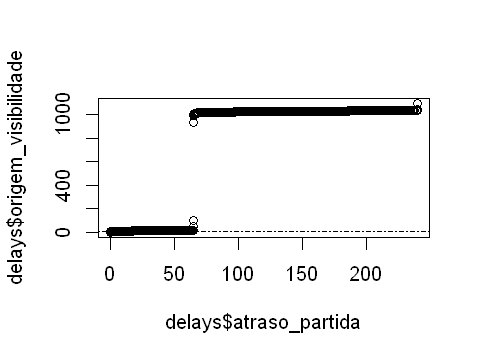

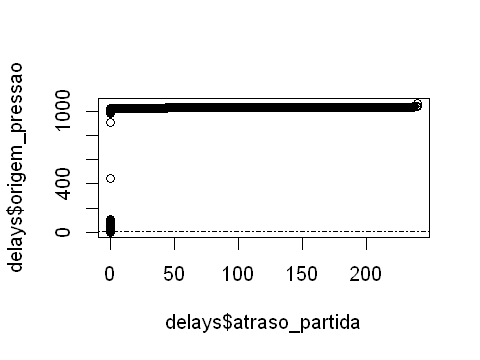

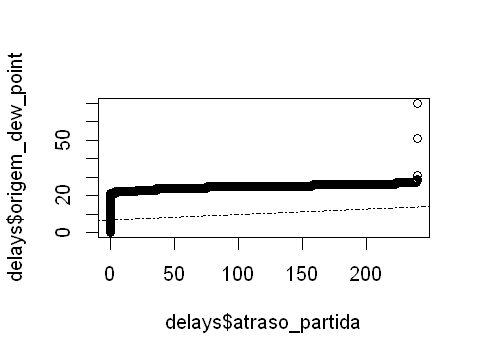

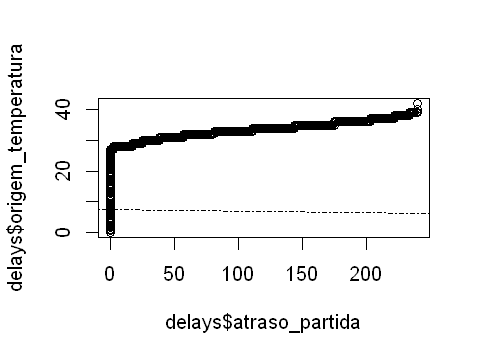

In [32]:
delays = vrawu17[vrawu17$atraso_partida >=0  & vrawu17$atraso_partida <= 240,]
options(repr.plot.width=4, repr.plot.height=3)
qqplot(delays$atraso_partida, delays$origem_visibilidade)
fm <- lm(delays$atraso_partida ~ delays$origem_visibilidade)
abline(coef(fm), lty=4)

options(repr.plot.width=4, repr.plot.height=3)
qqplot(delays$atraso_partida, delays$origem_pressao)
fm <- lm(delays$atraso_partida ~ delays$origem_pressao)
abline(coef(fm), lty=4)

options(repr.plot.width=4, repr.plot.height=3)
qqplot(delays$atraso_partida, delays$origem_dew_point)
fm <- lm(delays$atraso_partida ~ delays$origem_dew_point)
abline(coef(fm), lty=4)

options(repr.plot.width=4, repr.plot.height=3)
qqplot(delays$atraso_partida, delays$origem_temperatura)
fm <- lm(delays$atraso_partida ~ delays$origem_temperatura)
abline(coef(fm), lty=4)

### Mapa do Brasil
Fonte: https://downloads.ibge.gov.br/downloads_geociencias.htm

Primeiro temos que obter os dados de localização dos aeroportos

In [4]:
message=FALSE
library(data.table)
library(dplyr) #select %>%
airport = fread("dataset/airports_simplified.csv")

br_airport = select(airport[country == 'Brazil'],ICAO) 

vw = merge( atrasos, br_airport, by.x = "icao_destino", by.y = "ICAO")
vw = merge( atrasos, br_airport, by.x = "icao_origem", by.y = "ICAO")


vw = vw[c("icao_origem", "icao_destino")]
vw = vw %>% group_by(icao_destino,icao_origem) %>% summarize(Count = n())

library(tidyverse)
vw$icao_destino = as.character(vw$icao_destino)
vw$icao_origem = as.character(vw$icao_origem)
vw = vw %>%
    rowwise() %>%
    mutate(grp = paste0(sort(c(icao_destino, icao_origem)), collapse = "_")) %>%
    ungroup() %>%
    group_by(grp) %>%
    summarise(Count = sum(Count)) %>%
    separate(grp, into = c("icao_destino", "icao_origem"))


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Conflicts with tidy packages ---------------------------------------------------
between():   dplyr, data.table
filter():    dplyr, stats
first():     dplyr, data.table
lag():       dplyr, stats
last():      dplyr, data.table
transpose(): purrr, data.table


In [5]:
#Join Departure
vra_wu<-vw
vra_wu= merge(vra_wu,airport, by.x="icao_destino", by.y="ICAO")
colnames(vra_wu)[colnames(vra_wu) == "name"] = "destiny_airport_name"
colnames(vra_wu)[colnames(vra_wu) == "city"] = "destiny_city"
colnames(vra_wu)[colnames(vra_wu) == "country"] = "destiny_country"
colnames(vra_wu)[colnames(vra_wu) == "latitude"] = "destiny_latitude"
colnames(vra_wu)[colnames(vra_wu) == "longitude"] = "destiny_longitude"

#Join Origin
vra_wu= merge(vra_wu,airport, by.x="icao_origem", by.y="ICAO")
colnames(vra_wu)[colnames(vra_wu) == "name"] = "origin_airport_name"
colnames(vra_wu)[colnames(vra_wu) == "city"] = "origin_city"
colnames(vra_wu)[colnames(vra_wu) == "country"] = "origin_country"
colnames(vra_wu)[colnames(vra_wu) == "latitude"] = "origin_latitude"
colnames(vra_wu)[colnames(vra_wu) == "longitude"] = "origin_longitude"

In [1]:
ls()

character(0)

Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()

Attaching package: 'maps'

The following object is masked from 'package:purrr':

    map

Warning message:
"use rgdal::readOGR or sf::st_read"Regions defined for each Polygons


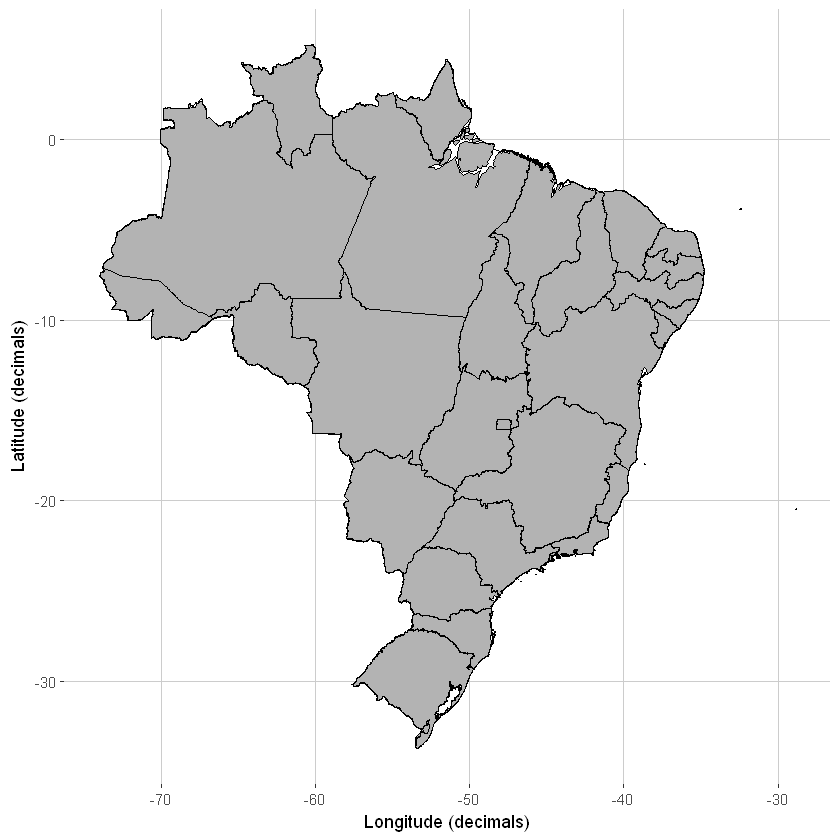

In [6]:
library(ggplot2)
library(maptools)


mapa <- borders(database ="world", regions = "Brazil", fill = "grey70", colour = "black")

brazil <- ggplot() + mapa + theme_bw() + xlab("Longitude (decimals)") + ylab("Latitude (decimals)") + 
  theme(panel.border = element_blank(), panel.grid.major = element_line(colour = "grey80"), panel.grid.minor = element_blank())

estados <- readShapePoly("dataset/br_unidades_da_federacao/BRUFE250GC_SIR.shp")
estados1 <- fortify(estados)

br_est <- brazil + geom_path(data = estados1, aes(x = long, y = lat, group = group), colour = "black")
br_est

In [12]:
#library(tidyverse)
#library(maps)
library(geosphere)

vra_wu = vra_wu[vra_wu$icao_origem == 'SBGR',]

par(mar=c(0,0,0,0))
#map('world','Brazil',col="#f2f2f2", fill=TRUE, bg="white", lwd=0.05,mar=rep(0,4),border=0, resolution=0)
pal <- colorRampPalette(c("#666666", "black"))
colors <- pal(30)

max_cnt = max(vra_wu$Count)
min_cnt = min(vra_wu$Count)
lwd_max = 5
lwd_min = 0.8


for (j in 1:dim(vra_wu)[1]) {
    #j=15*i
    origin = c(vra_wu$origin_longitude[j],vra_wu$origin_latitude[j])
    destiny = c(vra_wu$destiny_longitude[j],vra_wu$destiny_latitude[j])
     
    inter = as.data.frame(gcIntermediate(origin, destiny, n=100, addStartEnd=TRUE))
    pu = (vra_wu$Count[j] -min_cnt)/(max_cnt-min_cnt)
    col_index =1+ round(pu*(length(colors)-1))
    lin = pu*(lwd_max-lwd_min)+lwd_min
    
    names(inter) <- c("lon", "lat")
    br_est <- br_est + geom_line(data=inter, aes(x=lon, y=lat), color='#FFFFFF')
    
    #br_est <- br_est + inter
    #lines(inter, col=colors[col_index],lwd=lin)
    #lines(inter, col="#666666",lwd=0.5)
    #min=0.8
    #if (i==100){break}
}

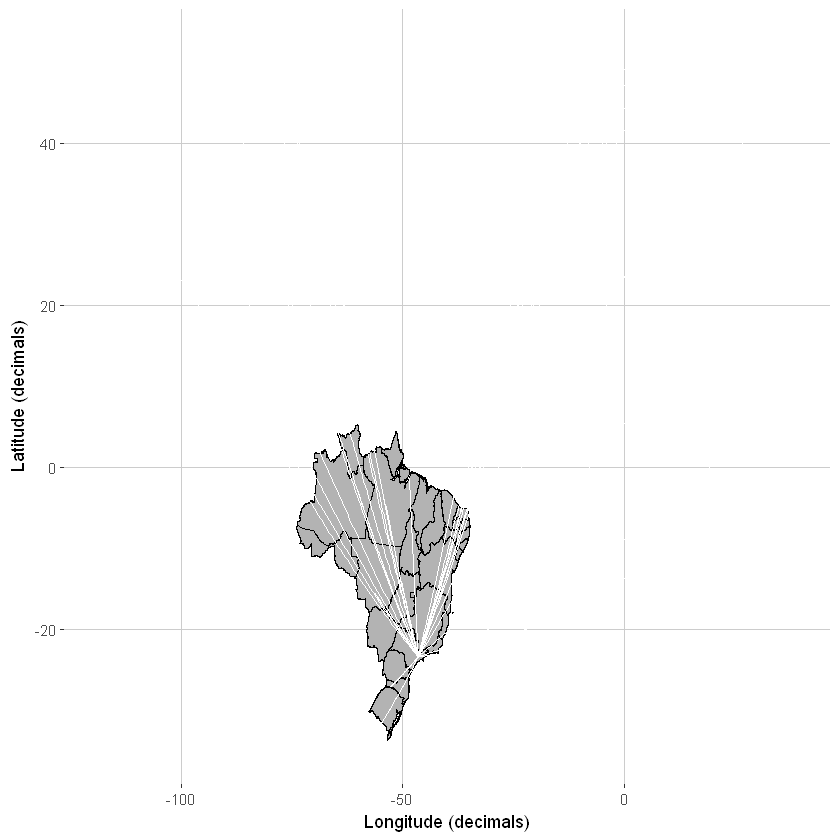

In [13]:
br_est